In [1]:
from helpers import *
from sentiment_functions import *
from emotion_functions import *

2022-07-12 11:04:38.199450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 11:04:38.199521: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-12 11:04:50.969430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 11:04:50.969501: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 11:04:50.969579: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (david-Aspire-A315-42): /proc/driver/nvidia/version does not exist
2022-07-12 11:04:50.971875: I tensorflow/core/platform/c

# SENTIMENT ANALYSIS

In [2]:
df= pd.read_csv('/home/david/Escritorio/sa_bertsent_uk_sentences_title_clean_.csv')

In [3]:
df.rename(columns={'Title': 'Title_en', 'Text': 'Text_en'}, inplace=True)

In [4]:
df=df.drop(df[df['Date']<'2020-01-01'].index,inplace=False)

In [5]:
df=df.drop(df[df['Date']>'2021-10-31'].index,inplace=False)

In [6]:
df.replace({'sentiment_title': 1}, {'sentiment_title': 'Neutral'}, regex=True,inplace=True)
df.replace({'sentiment_title': 0}, {'sentiment_title': 'Negative'}, regex=True,inplace=True)
df.replace({'sentiment_title': 2}, {'sentiment_title': 'Positive'}, regex=True,inplace=True)

In [7]:
df

Title_en  \
0     Vaccine staff threatened after leftover doses ...   
1     Exclusive: Brexit may have helped UK win race ...   
2     Failure to share Covid jabs a ‘historic moral ...   
3     Israel faces Covid surge as virus circulates e...   
4     Growing calls for release guidelines on market...   
...                                                 ...   
4891  India reopens for foreign tourists on charter ...   
4892  Two further deaths linked to Covid-19 as 104 n...   
4893  Clinically extremely vulnerable can book Covid...   
4894  Analysis: 'Great grief' of man who lost two me...   
4895  Denial of care home visits breaches human righ...   

                                            Subheadline  \
0     Derbyshire police confirmed they were investig...   
1     Decoupling from EU's regulatory and purchasing...   
2     The WHO also released new estimates suggesting...   
3     Delta variant blamed after clusters identified...   
4     There are currently no formal rules governing ...   
...                                                 ...   
4891                                             Topics   
4892                                             Topics   
4893                                             Topics   
4894                                             Topics   
4895                                             Topics   

                                                Text_en               Authors  \
0     Medical staff have received threats after dose...        Lizzie Roberts   
1     Brexit may have helped Britain win the race fo...         Henry Bodkin,   
2     The failure of rich nations to share Covid-19 ...       Jennifer Rigby,   
3     Israel has recommended vaccinating teenagers f...  Campbell MacDiarmid,   
4     Pressure is growing for clear guidelines over ...        Julia Bradshaw   
...                                                 ...                   ...   
4891  India has reopened to fully vaccinated foreign...          AP Reporters   
4892  Another two people have died after contracting...         Digital Staff   
4893  Clinically extremely vulnerable (CEV) people w...        Maeve Connolly   
4894  WARNINGS about a "pandemic of the unvaccinated...         Seanín Graham   
4895  The Commissioner for Older People for Northern...          Tanya Fowles   

            Date                                               Link  n_words  \
0     2021-02-05  https://www.telegraph.co.uk/news/2021/02/05/va...      276   
1     2020-12-02  https://www.telegraph.co.uk/news/2020/12/02/ex...      793   
2     2021-10-21  https://www.telegraph.co.uk/global-health/scie...      680   
3     2021-06-22  https://www.telegraph.co.uk/news/2021/06/22/is...      388   
4     2020-11-23  https://www.telegraph.co.uk/business/2020/11/2...      503   
...          ...                                                ...      ...   
4891  2021-10-15  https://www.irishnews.com/news/worldnews/2021/...      238   
4892  2021-05-18  http://www.irishnews.com/news/northernirelandn...      332   
4893  2021-02-12  http://www.irishnews.com/news/healthcarenews/2...      271   
4894  2021-09-16  http://www.irishnews.com/news/northernirelandn...      533   
4895  2021-03-10  http://www.irishnews.com/news/council/2021/03/...      577   

           Newspaper         Country sentiment_title  \
0      The Telegraph  United Kingdom        Negative   
1      The Telegraph  United Kingdom         Neutral   
2      The Telegraph  United Kingdom        Negative   
3      The Telegraph  United Kingdom         Neutral   
4      The Telegraph  United Kingdom         Neutral   
...              ...             ...             ...   
4891  THE IRISH NEWS  United Kingdom         Neutral   
4892  THE IRISH NEWS  United Kingdom        Negative   
4893  THE IRISH NEWS  United Kingdom         Neutral   
4894  THE IRISH NEWS  United Kingdom        Negative   
4895  THE IRISH NEWS  United Kingdom        Negative   

                      

In [8]:
import ast
for index,row in df.iterrows(): 
    df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
    df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])

/tmp/ipykernel_268861/1314926012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_sentences'][index]= ast.literal_eval(df['list_sentences'][index])
/tmp/ipykernel_268861/1314926012.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['list_labels'][index]= ast.literal_eval(df['list_labels'][index])


In [9]:
list_porcentage_positive_sentences=[]
list_porcentage_neutral_sentences=[]
list_porcentage_negative_sentences=[]
for index,row in df.iterrows(): 
    list_porcentage_negative_sentences.append(df['list_labels'][index].count(0)/len(df['list_labels'][index]))
    list_porcentage_neutral_sentences.append(df['list_labels'][index].count(1)/len(df['list_labels'][index]))
    list_porcentage_positive_sentences.append(df['list_labels'][index].count(2)/len(df['list_labels'][index]))
df['porcentage_positive']=list_porcentage_positive_sentences
df['porcentage_negative']=list_porcentage_negative_sentences
df['porcentage_neutral']=list_porcentage_neutral_sentences

In [10]:
df['n_words'] = df.Text_en.apply(lambda x: len(str(x).split(' ')))

In [11]:
df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAMES_ENGLISH_WITH_SENTIMENT/sa_bertsent_uk_english_sentences_title.csv', index = False)

# General descriptive analysis of articles in UK

In [12]:
list_sentences=[]
for index,row in df.iterrows(): 
    for sentence in df['list_sentences'][index]:
        list_sentences.append(sentence)
len(list_sentences)

134060

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Covid vaccine safe for pregnant women – immunity will be passed on to babies
Single-shot Janssen Covid vaccine could be approved 'in weeks' and help protect millions in UK
‘Historic moment’ as first ever malaria vaccine approved for use across Africa
SAMPLES OF NEGATIVE HEADLINES
Could children have been our secret weapon against coronavirus?
Hesitancy to get a shot will cost lives. It's our duty to call out conspiracists
Calls for 'vindictive' Ursula von der Leyen to resign over Irish border debacle


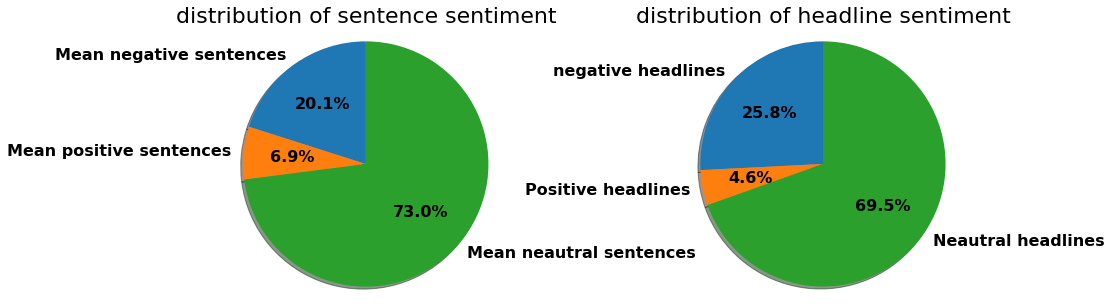

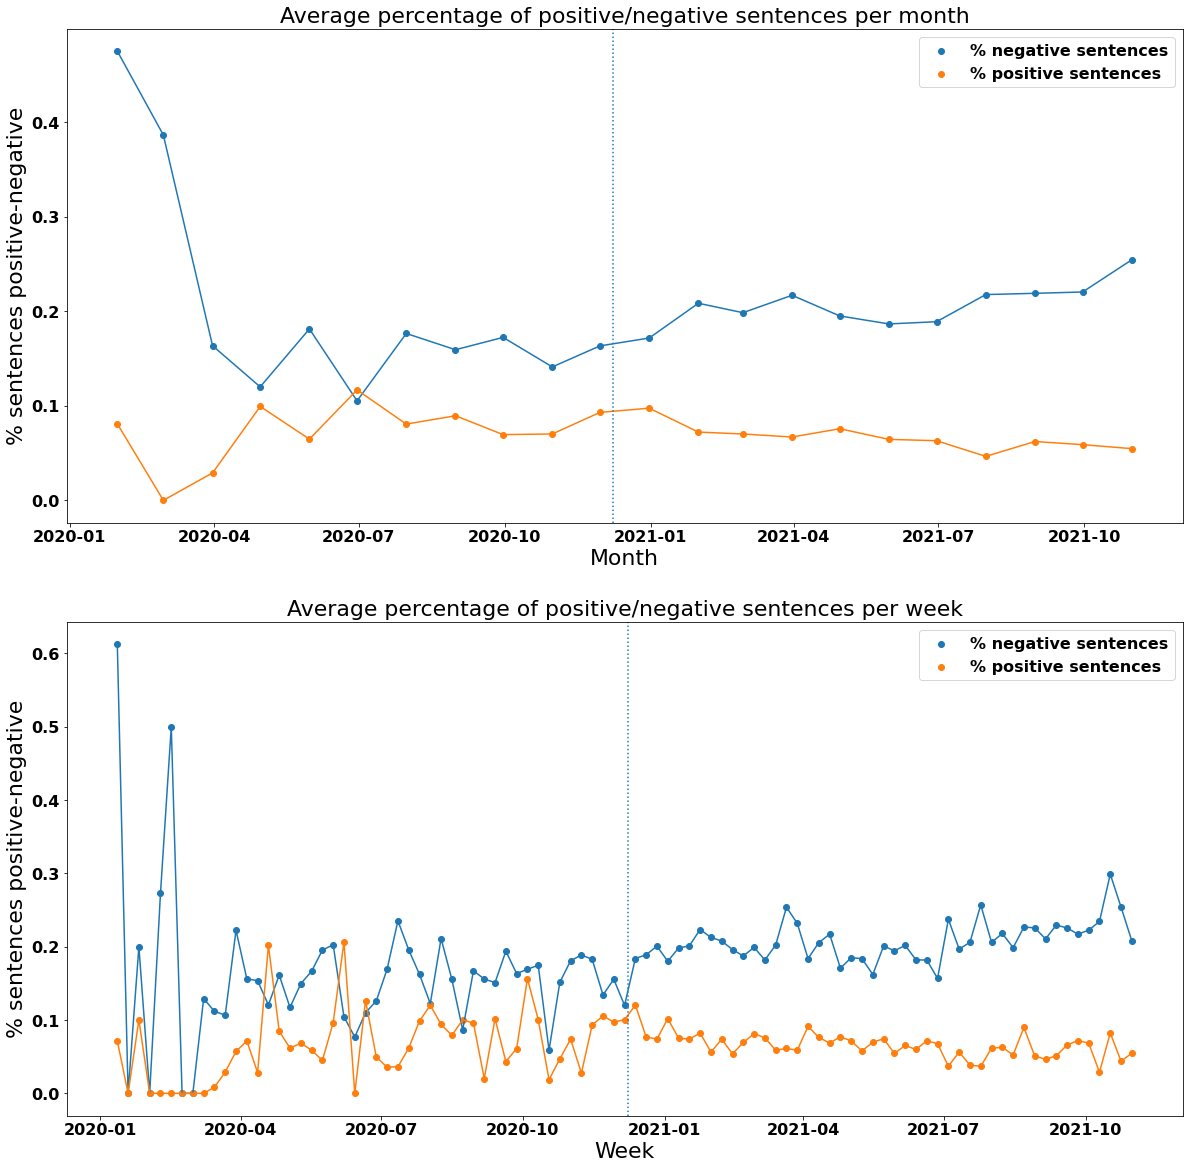

In [13]:
sentiment_analysis(df,'2020-12-08')

In [14]:
# emotion_analysis(df)

In [19]:
# df.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_uk_english_title_emotion.csv', index = False)

In [2]:
df= pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DATAFRAMES_ENGLISH/MERGED_DATAFRAME_ENGLISH_EMOTION/sa_bertsent_uk_english_title_emotion.csv')

In [3]:
def plot_emotions(subset):
    ax = subset['emotion_transformers_1'].value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct)
    ax.axes.get_yaxis().set_visible(False)
    plt.legend()

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


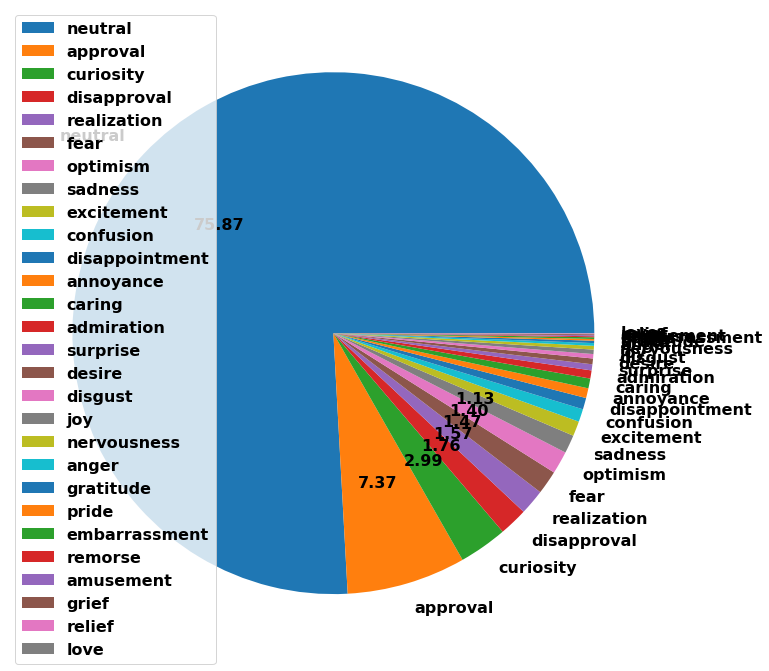

In [4]:
plot_emotions(df)

# SUBTOPICS 

I think it is useful for the analysis of subtopics not to take into account the articles that review the most important news of the week, because they deal with many different topics and I consider that they have an impact on the results.

In [5]:
df_sub=df.drop(df[df['n_words']>3000].index,inplace=False)

In [6]:
ue_words="European Union|EU|European Commission"
european_union=df_sub[(df_sub['Title_en'].str.contains(ue_words))|(df_sub['Text_en'].str.contains(ue_words))]

In [7]:
len(european_union)/len(df_sub)

0.1841276978417266

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
Letters: Stories to be proud of from the frontline of the vaccination programme
'I can’t wait to see my granddaughter' - Telegraph readers on the week's biggest talking points
Covid vaccine roll-out advanced in Scotland thanks to Union, says Boris Johnson
SAMPLES OF NEGATIVE HEADLINES
Britain has been left horribly exposed to changes in the financial weather
Macron’s lorry ban is utterly pointless – mutant Covid is already all over Europe
We need to talk about the disturbing influence of anti-vaxx propaganda on ethnic minorities


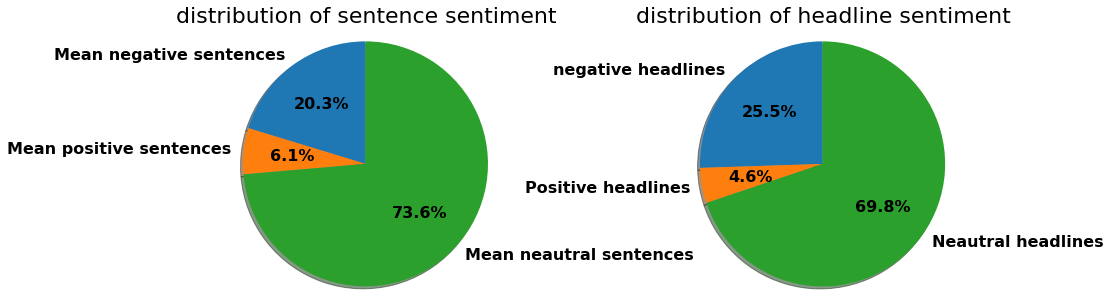

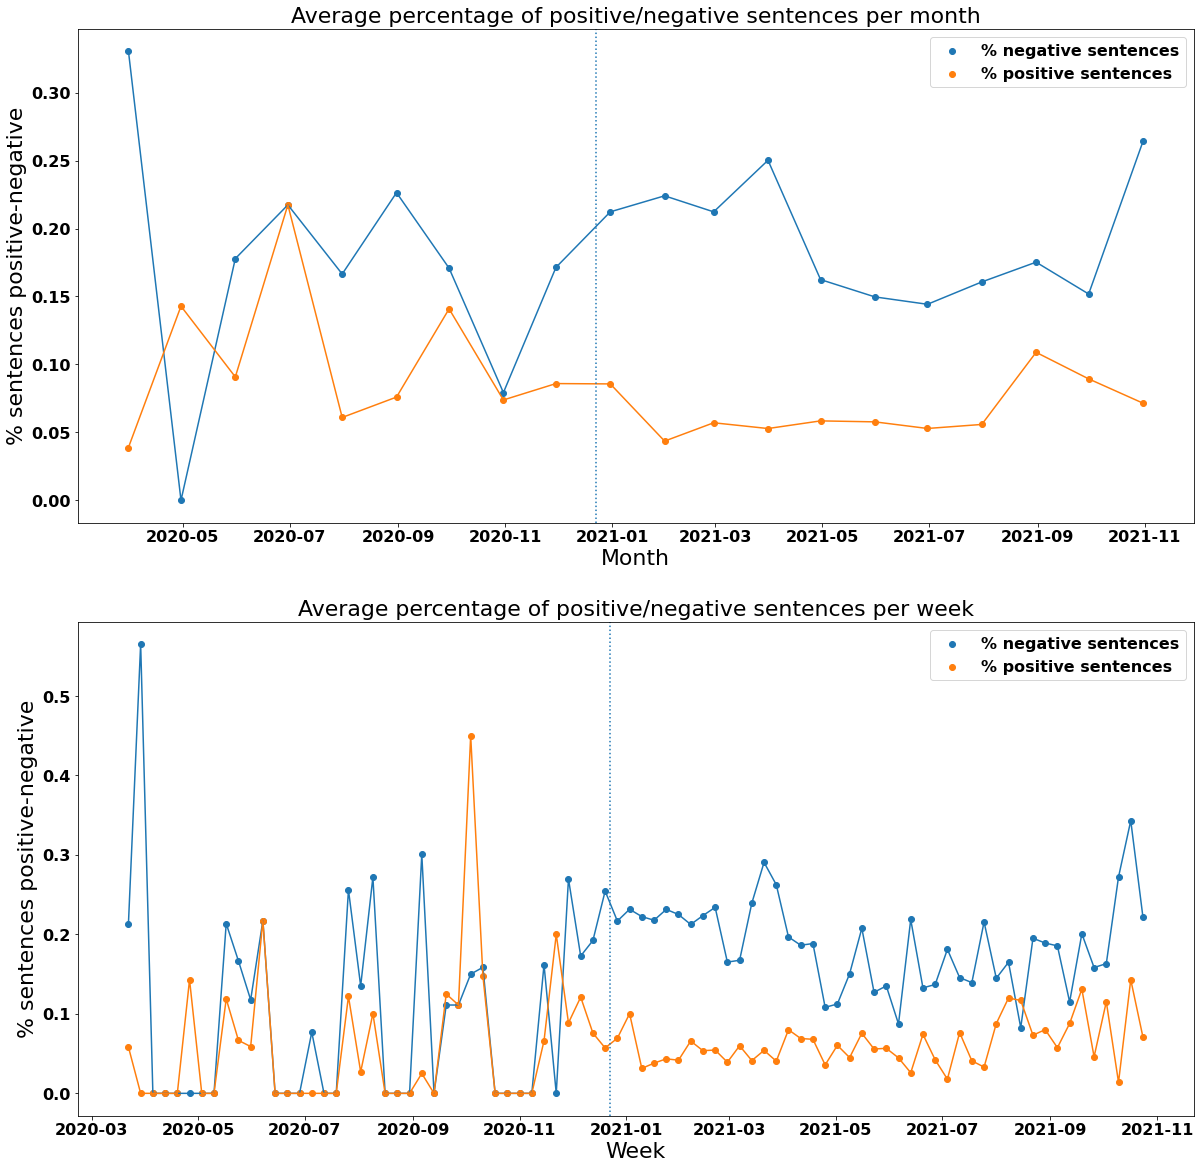

In [8]:
sentiment_analysis(european_union,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


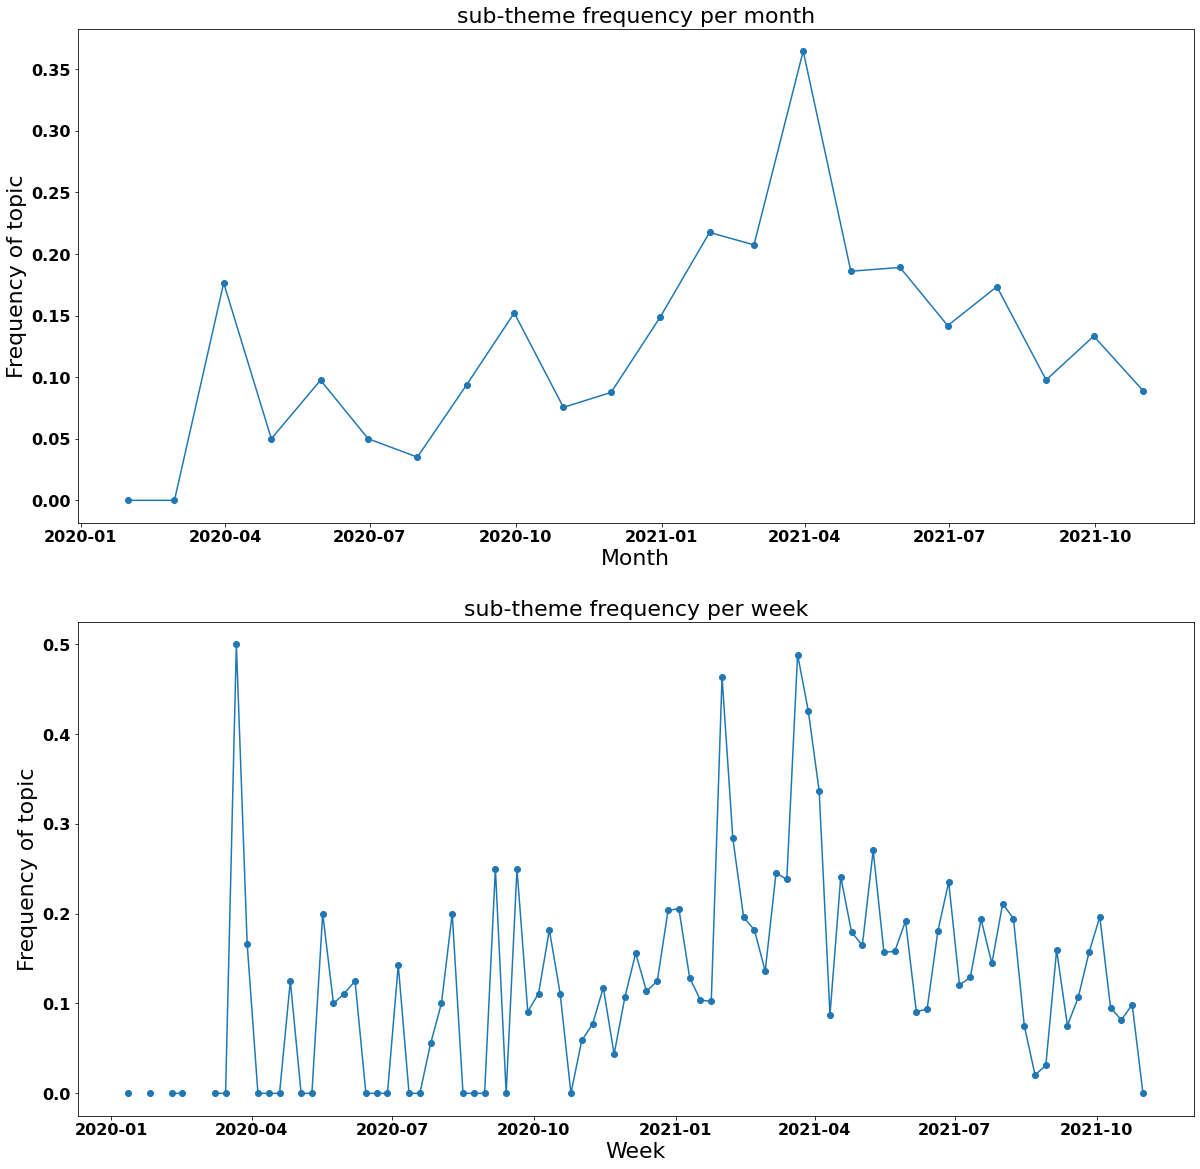

In [9]:
frequency_topics(df_sub, european_union)

In [17]:
# #get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(european_union.list_labels[39]) if x == 0]
# for i in indices: 
#     print(european_union.list_sentences[39][i])

SAMPLES OF POSITIVE SENTENCES
It may well be very good and Sanofi’s involvement will mean it has plenty of support in the European Union.
“Oxfam fully support Mary Robinson’s call for EU leaders to urgently reconsider their opposition to the Trips waiver – and offer their full support.
SAMPLES OF NEGATIVE SENTENCES
In Britain, officials have argued that European Union opposition was driven by envy and the politics of Brexit.
The numbers suggest not.According to the charity Thrombosis UK, up to one in 1,000 people each year will experience a dangerous blood clot in a vein, known as a venous thrombosis.That means about 66,000 people in Britain might be expected to suffer a blood clot annually– or 1,269a week.According to AstraZeneca, there have been 15 events of deep vein thrombosis (DVT) and 22 events of pulmonary embolism (PE) reported among those given the vaccine so far across the EU and UK, based cases up to March 8.


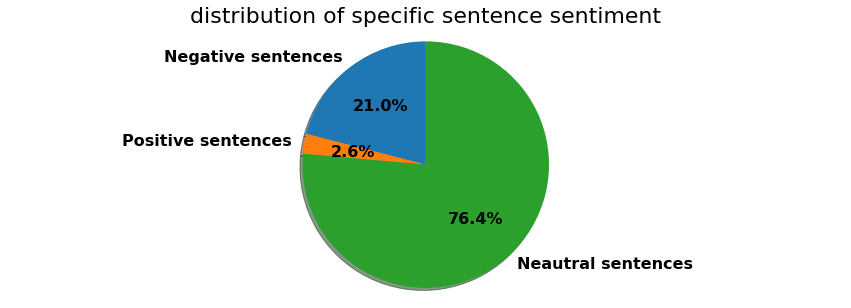

In [18]:
sentences_with_word(european_union,ue_words)

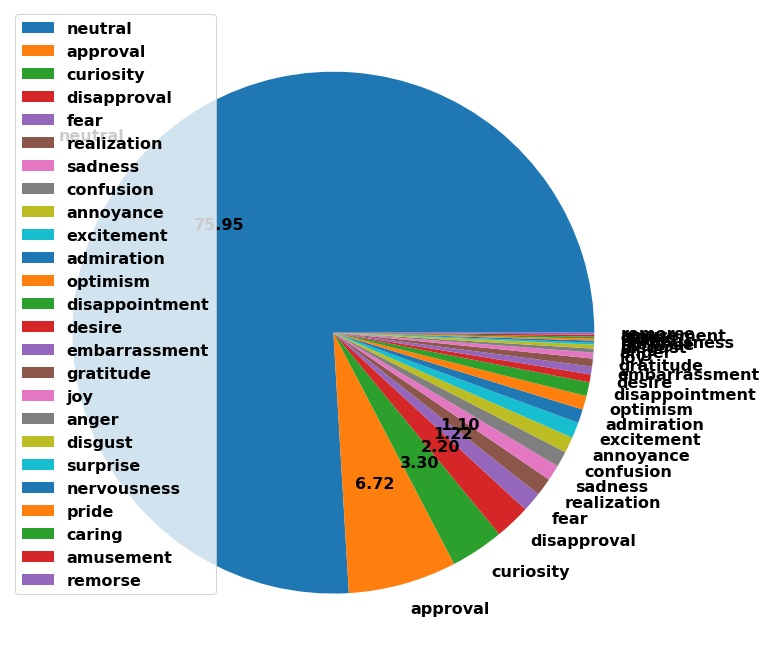

In [10]:
plot_emotions(european_union)

In [11]:
no_vax_words="anti-vaxxers|anti-vaccine|anti-vaxx|anti-corona|no-vax|no vax|anti-vaccin"
no_vax=df_sub[(df_sub['Title_en'].str.contains(no_vax_words))|(df_sub['Text_en'].str.contains(no_vax_words))]
len(no_vax)/len(df_sub)

0.03799460431654676

SAMPLES OF POSITIVE HEADLINES
Have you had the Covid jab? Great, then let’s hook up
'I'm a freedom-loving Conservative... I can't wait to get us back to living by personal responsibility'
Queen's championing of nation's vaccine efforts shows her personal commitment in a time of crisis
SAMPLES OF NEGATIVE HEADLINES
'Anti-vaxx' influence means up to half may not take coronavirus vaccine
Six in 10 care homes will be forced to sack staff over Covid vaccination
No jab, no date: why not being vaccinated could become the new dating deal-breaker


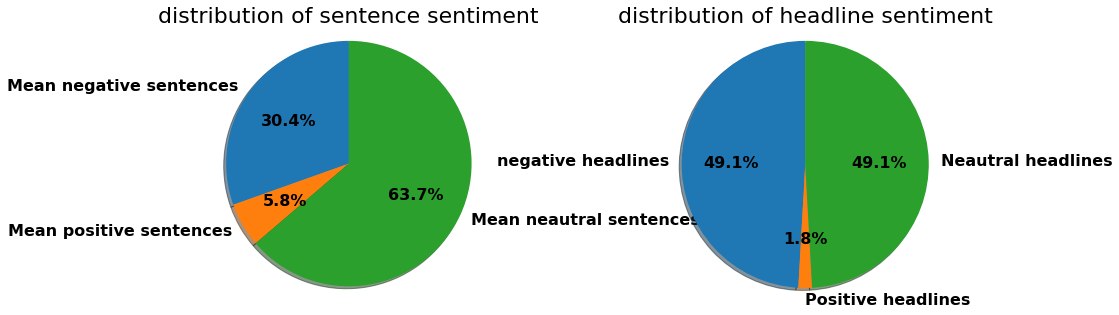

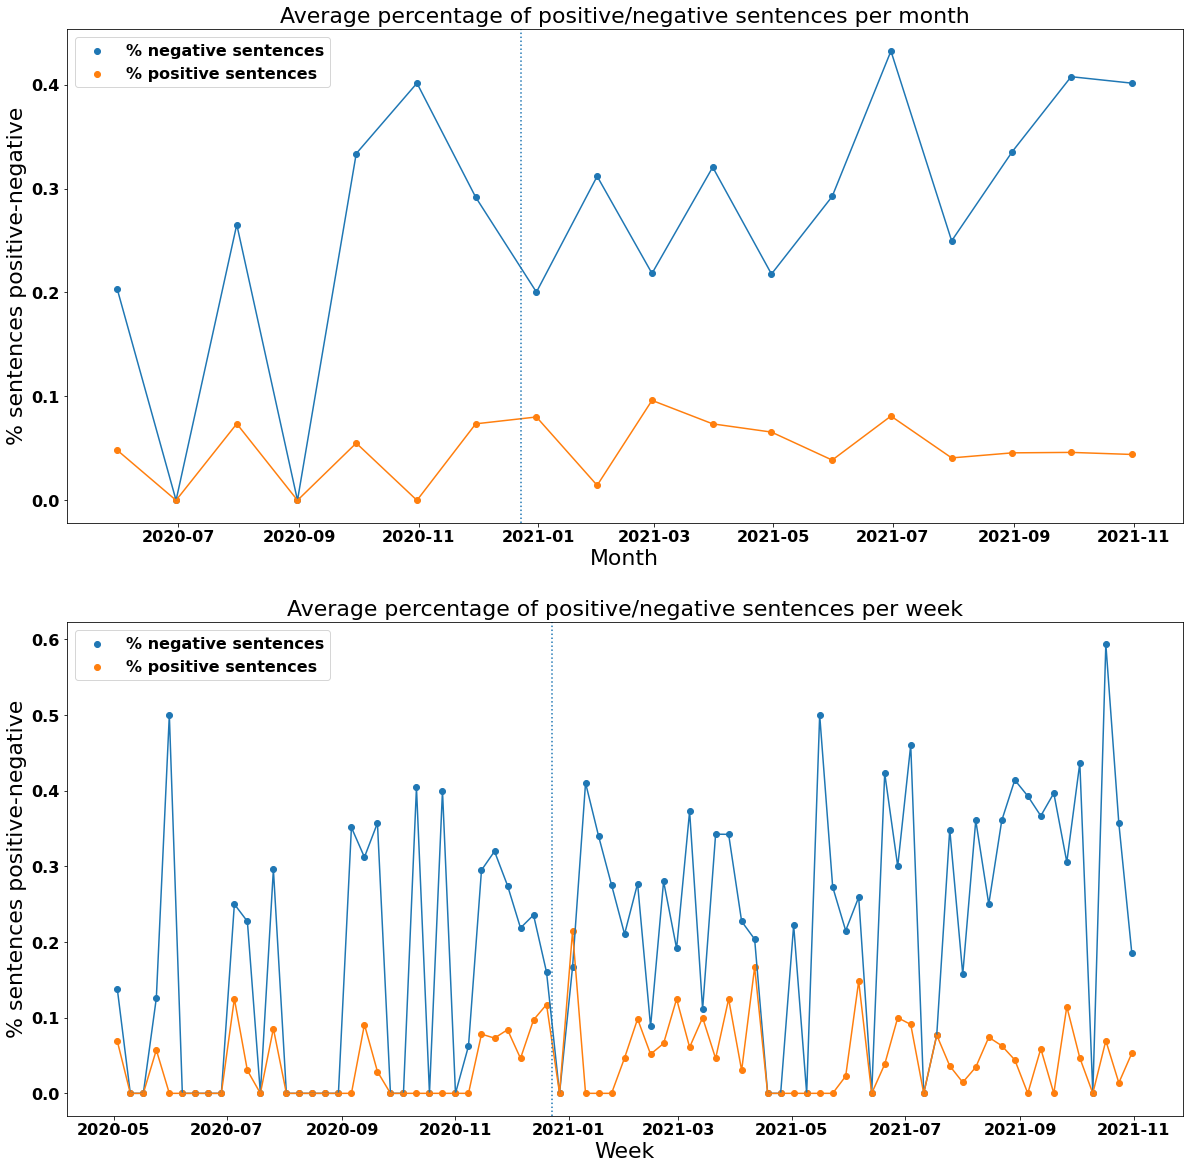

In [12]:
sentiment_analysis(no_vax,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


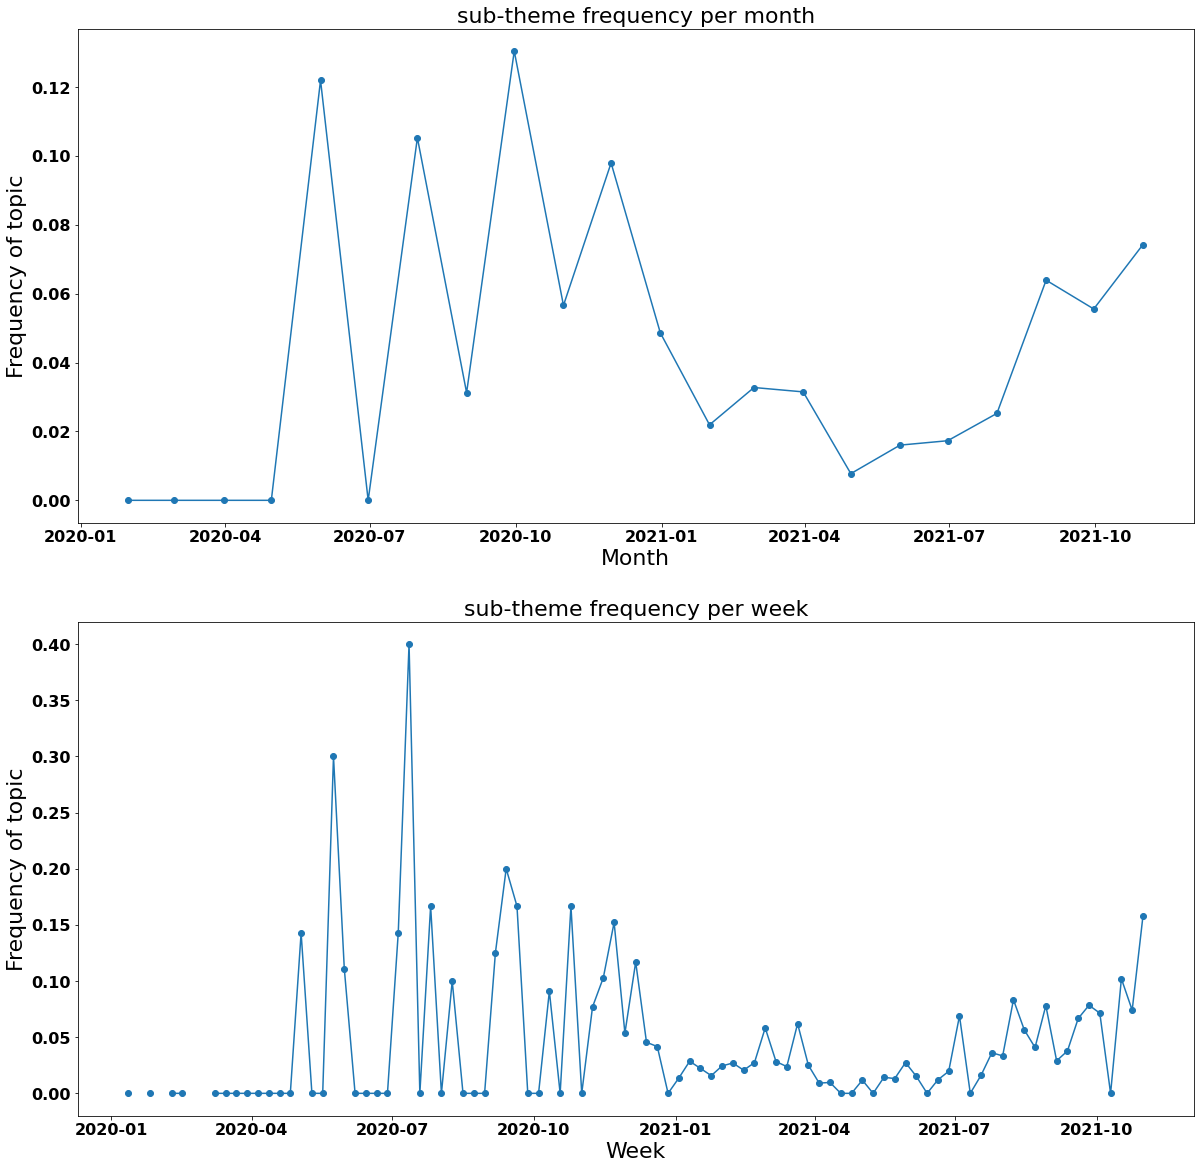

In [13]:
frequency_topics(df_sub, no_vax)

In [14]:
# ### get the index of positive/negative/neutral sentences of the list of sentences
# indices = [i for i, x in enumerate(no_vax.list_labels[33]) if x == 0]
# for i in indices: 
#     print(no_vax.list_sentences[33][i])

SAMPLES OF POSITIVE SENTENCES
No samples of positive sentences
SAMPLES OF NEGATIVE SENTENCES
We have got a disease we now understand, a safe vaccine that works, but the wards are full of people who don’t believe that to be true.”Four in ten people admitted to hospital with Covid are not fully vaccinated, according to new figures from the UK Health Security Agency, which has replaced Public Health England.Montgomery is exasperated by the conspiracy theories peddled by anti-vaxxers, even as infection rates continue to soar.“There is a lot of misinformation and disinformation but you have to listen to trusted resources,” he says.
“When you start to unpick the objections people have to vaccines, a lot of it doesn’t make any sense.”She hopes explaining the science will be enough to stymie the claims of the anti-vaxxers and prevent her hard work from unravelling.


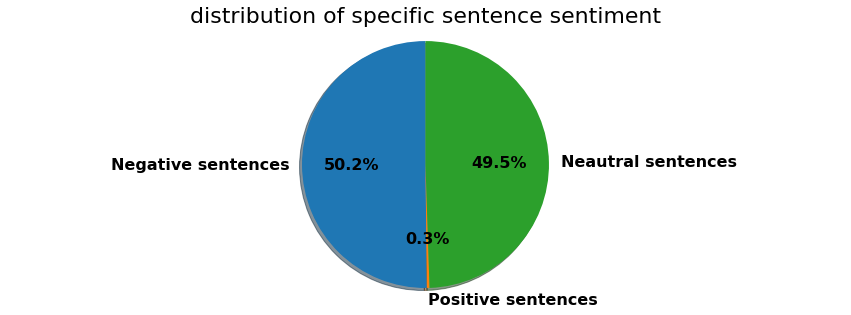

In [23]:
sentences_with_word(no_vax,no_vax_words)

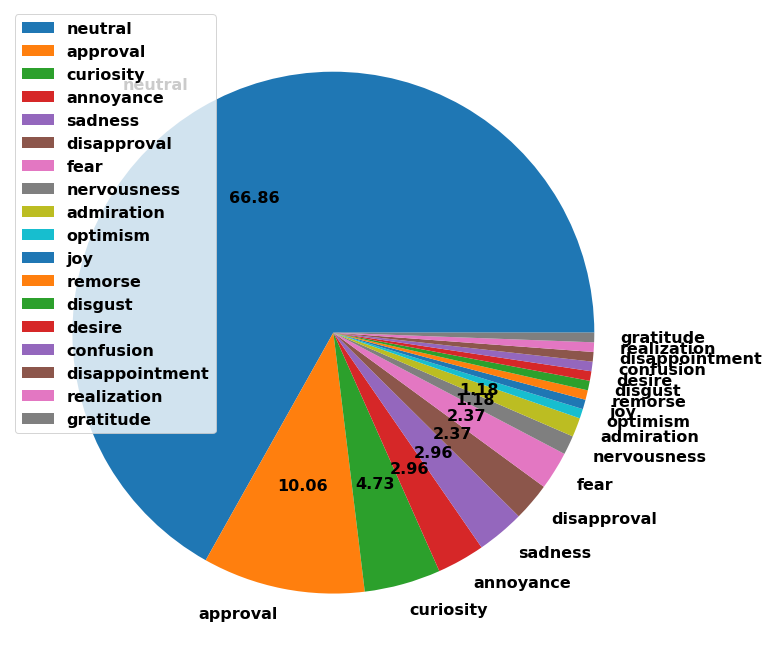

In [15]:
plot_emotions(no_vax)

In [24]:
economy_words="gdp|bank|economy|economist|investment|market"
economy=df_sub[(df_sub['Title_en'].str.contains(economy_words))|(df_sub['Text_en'].str.contains(economy_words))]
len(economy)/len(df_sub)

0.21987410071942445

SAMPLES OF POSITIVE HEADLINES
Astra’s vaccine is a private sector triumph — now the state must match it
Nadhim Zahawi moves up a grade after his victorious vaccine rollout scheme
Vaccines are stopping the Covid pandemic – and it’s time to celebrate the achievement
SAMPLES OF NEGATIVE HEADLINES
SNP's vaccine passport scheme in chaos as it can be 'outfoxed by a screenshot'
Russia sees record number of daily coronavirus infections and deaths
Is Britain prepared to go nuclear over China?


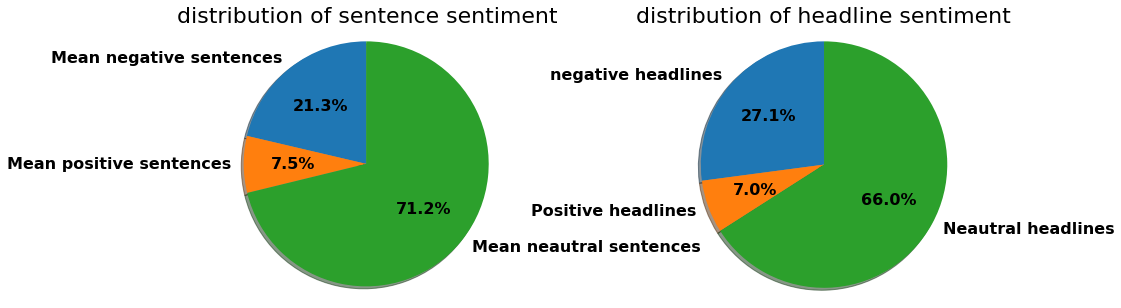

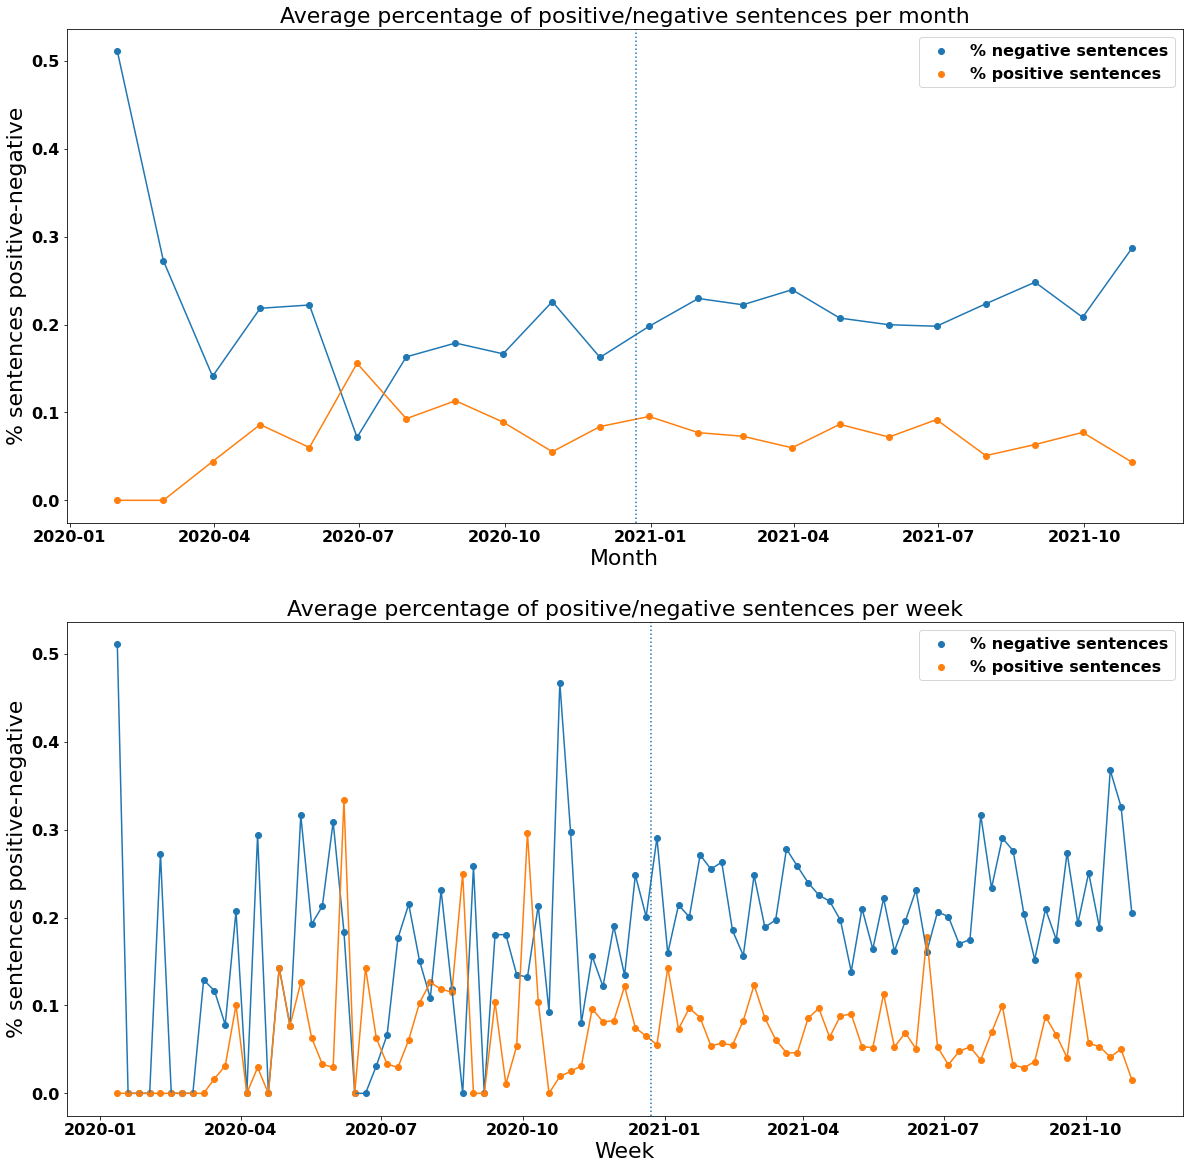

In [25]:
sentiment_analysis(economy,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


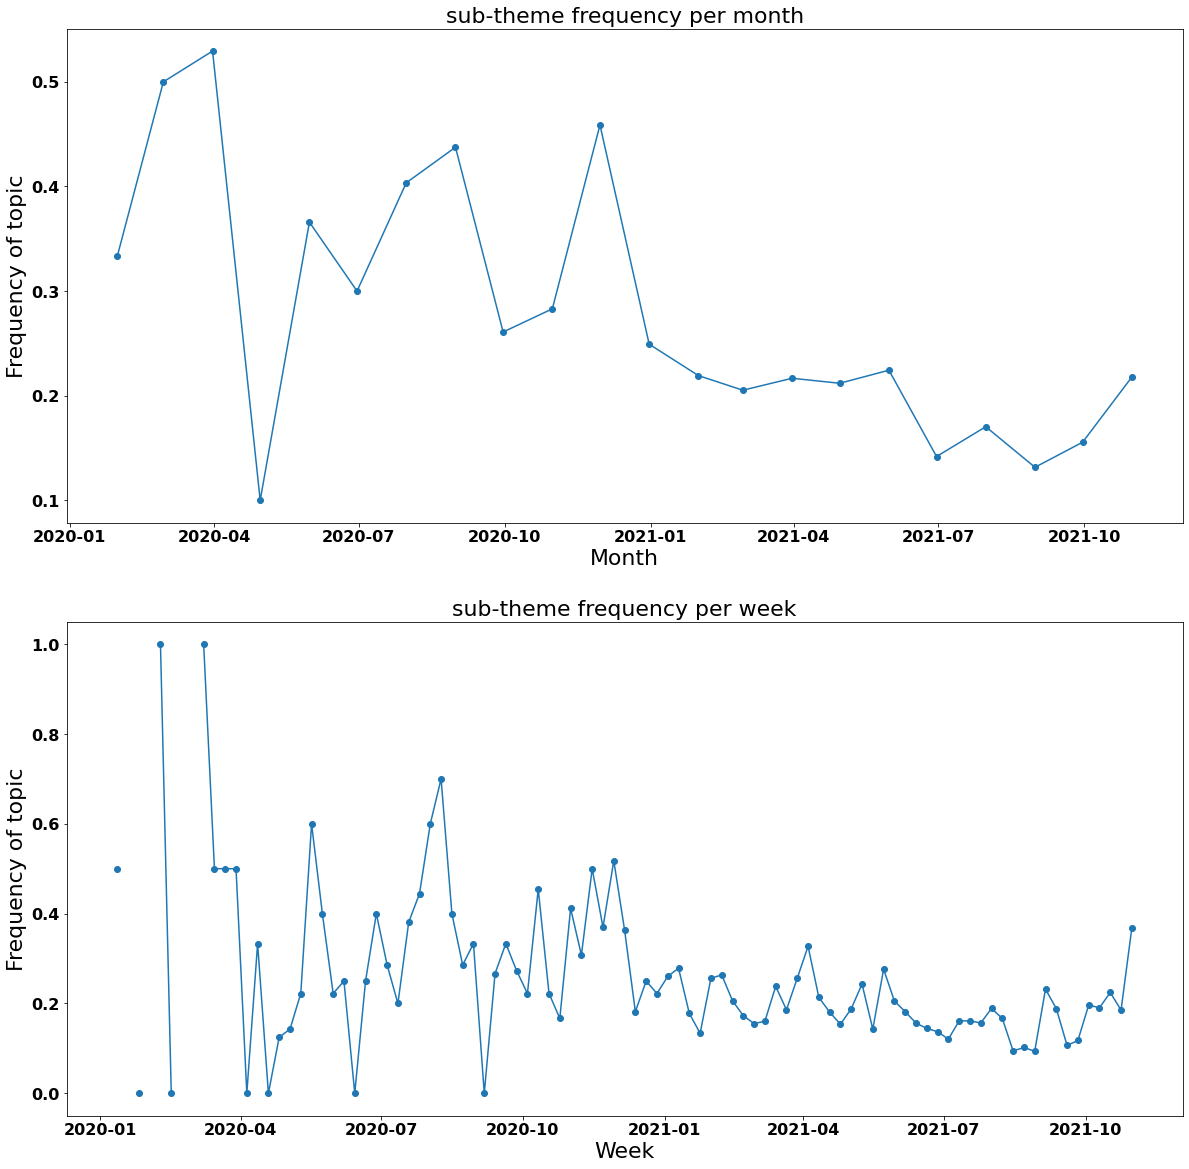

In [26]:
frequency_topics(df_sub, economy)

SAMPLES OF POSITIVE SENTENCES
Like a vaccine by rival Pfizer which sent markets surging with similarly promising pre-trial results last week, the Moderna jabuses mRNA to teach the bodys cells to recognise and fight the covid virus.Results from the clinical trial suggest the vaccine is nearly 95pc effective, with no serious side effects.
"Lets campaign to eat more British fish@Janet Pollard:"Living in Yorkshire, with the decent fishmongers long gone from the town and supermarkets now closing their "fresh" fish counters, fresh deliveries from Grimsby are a really welcome service.
SAMPLES OF NEGATIVE SENTENCES
Diane Dodds said a number of sectors in the economy have been “terribly impacted” by the coronavirus pandemic, noting that there is a backlog of 3,000 weddings to take place in the hotel sector.
The EU and EU leaders deserve plenty of stick for that.Julian Jessop is an independent economist.


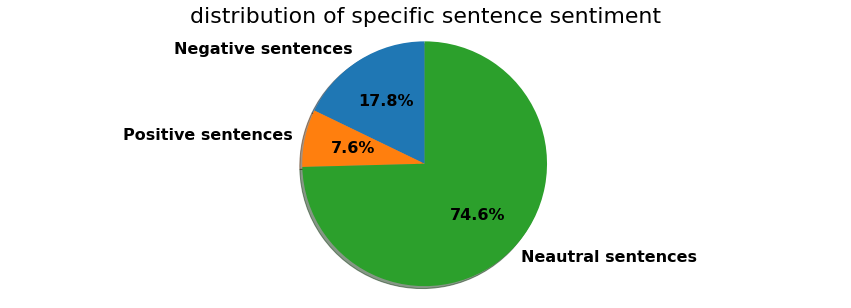

In [27]:
sentences_with_word(economy,economy_words)

In [28]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(economy.list_labels[4885]) if x == 0]
for i in indices: 
    print(economy.list_sentences[4885][i])

He said: “It essentially means we have 600,000 vaccines for quarter two that we didn’t have this morning, with Johnson & Johnson, which is a single-shot vaccine.
“Obviously we’ve lost some time.
We’ve lost a number of weeks in relation to all these changes that have occurred in the context of AstraZeneca and in Janssen.


In [29]:
education_words="education|pupil|classroom|student|school"
education=df_sub[(df_sub['Title_en'].str.contains(education_words))|(df_sub['Text_en'].str.contains(education_words))]
len(education)/len(df_sub)

0.20098920863309352

SAMPLES OF POSITIVE HEADLINES
Daughter's love of science prompts family to sign up for Oxford vaccine trial
Private members club vaccinating clients abroad is 'proud' to offer the service
Shopping vouchers and pizza discounts to boost vaccinations among the young
SAMPLES OF NEGATIVE HEADLINES
Letters: The EU demands British-funded vaccines but won’t make use of them
Coronavirus: 1,929 new cases and 11 further deaths
Why the conundrum of vaccinating children is so hard to crack


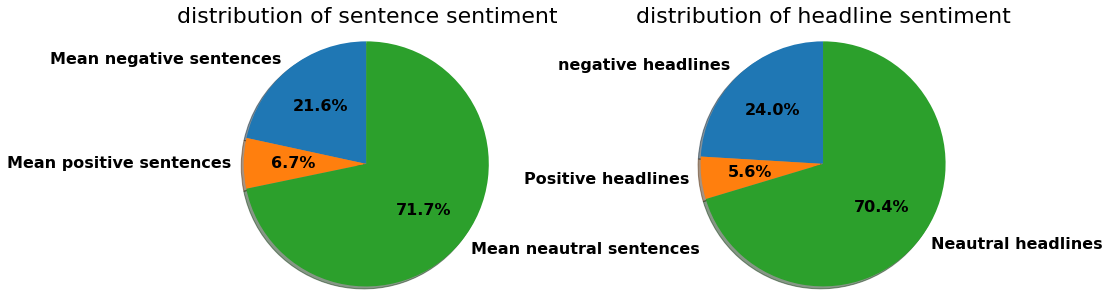

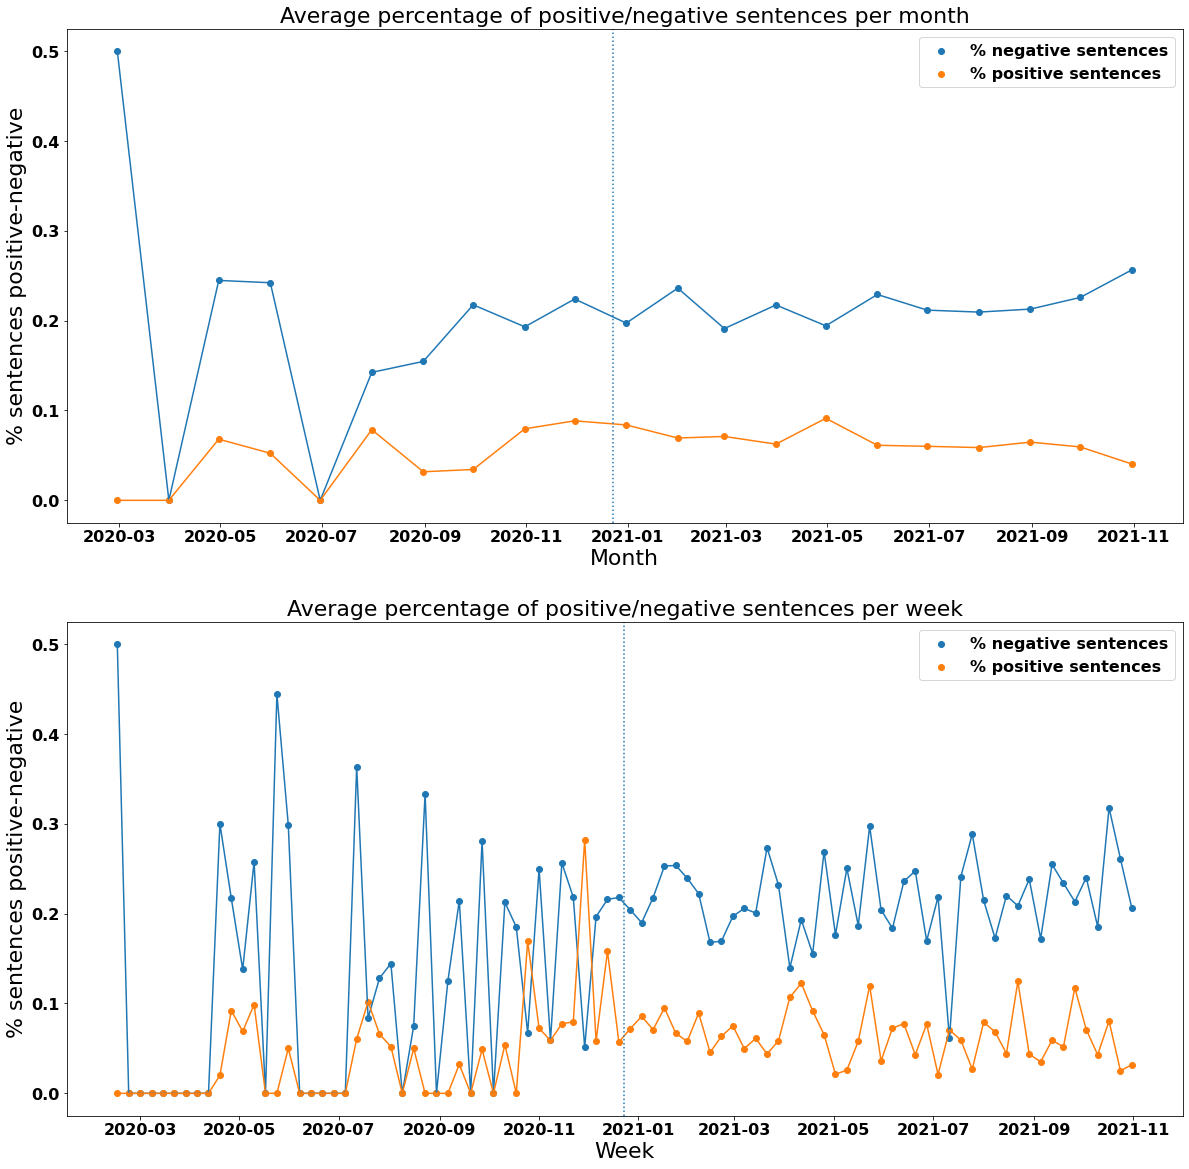

In [30]:
sentiment_analysis(education,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


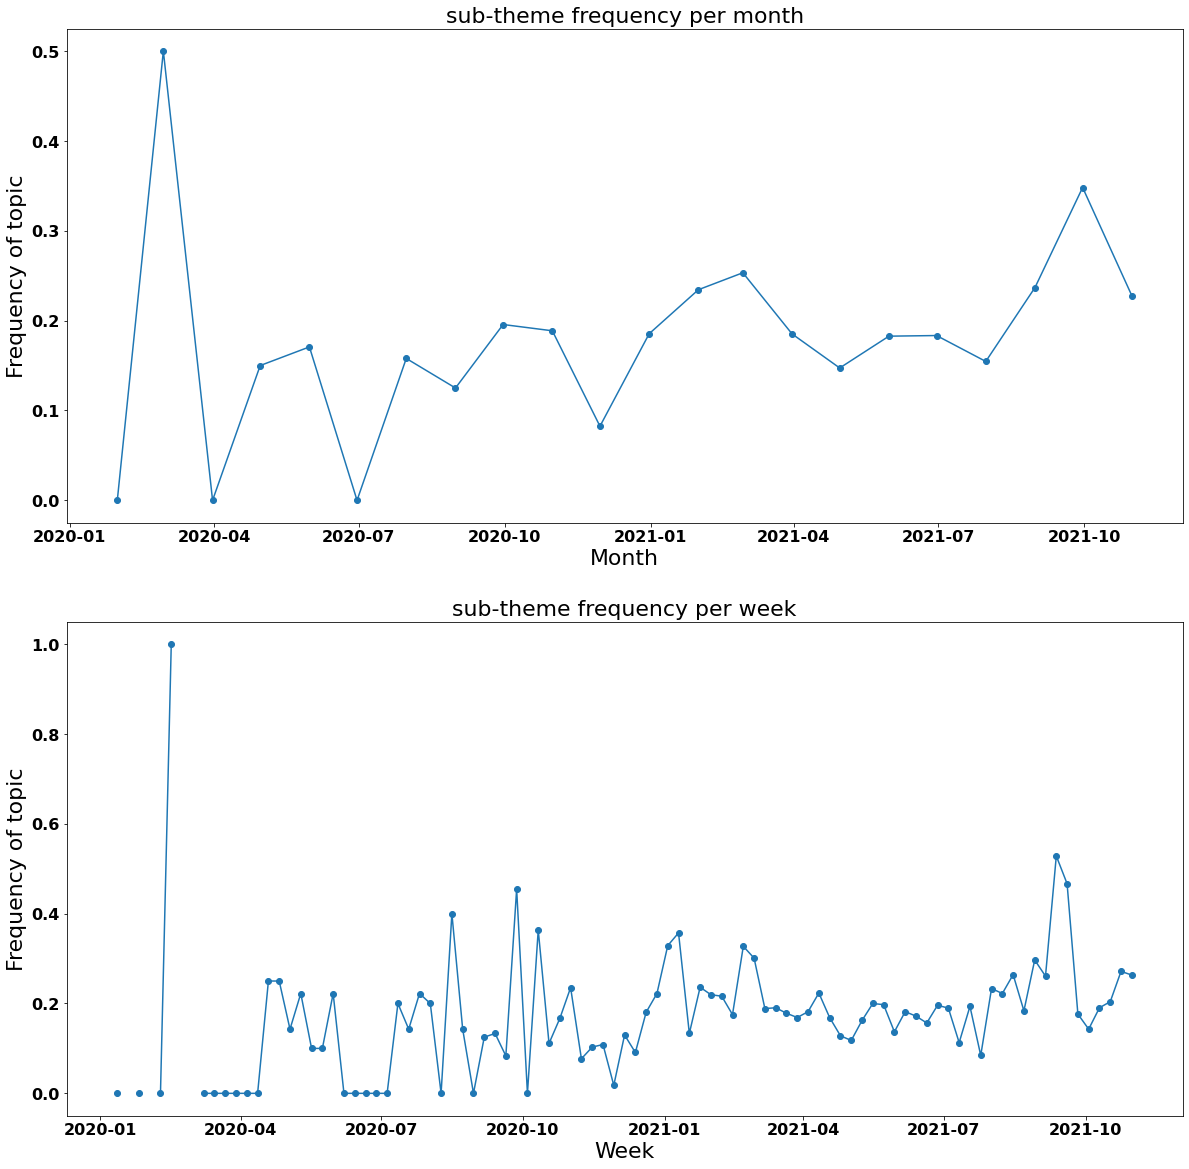

In [31]:
frequency_topics(df_sub, education)

SAMPLES OF POSITIVE SENTENCES
“You can see that in different responses to vaccines, too.”Beate Kampmann, professor of paediatric infection & immunity at the London School of Hygiene and Tropical Medicine, says that in school age children, they expect the immune responses to the coronavirus vaccine to be “equivalent, if not better” to older adults.“Healthy children generate good qualities of antibodies, and have an excellent response to vaccines.
“There is always a risk with any infection to people of all ages but children are relatively much less affected than other groups, which is one of the few good things you can say about coronavirus, and that will be important obviously when schools can go back.
SAMPLES OF NEGATIVE SENTENCES
This means that key workers in essential jobs and the education sector who cannot avoid a high risk of exposure to the virus will lose vaccine prioritisation.
The risk of Covid-19 transmission is greater at the school gates than in the classroom, a Public Hea

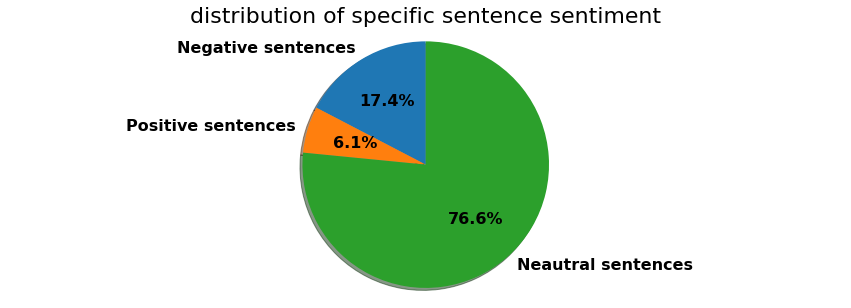

In [32]:
sentences_with_word(education,education_words)

In [33]:
education

Title_en  \
3     Israel faces Covid surge as virus circulates e...   
5     Amber list discriminates against young people,...   
8     Nadhim Zahawi moves up a grade after his victo...   
13    No more national lockdowns as Boris Johnson ri...   
19    Condemning the vaccine hesitant as 'idiots' wo...   
...                                                 ...   
4865  Republic of Ireland to re-enter Level 5 restri...   
4868  Prioritise teachers for Covid-19 vaccination, ...   
4876  Boris Johnson urges caution on Covid 'freedom ...   
4879  New guidance issued on vaccination for under-1...   
4889  Stormont ministers to meet to consider coronav...   

                                            Subheadline  \
3     Delta variant blamed after clusters identified...   
5     Government accused of unfairly denying quarant...   
8     Vaccines minister reaps reward as Cabinet resh...   
13    Government to announce new strategy reflecting...   
19    Winning over the vaccine hesitant is vital, bu...   
...                                                 ...   
4865                                             Topics   
4868                                             Topics   
4876                                             Topics   
4879                                             Topics   
4889                                             Topics   

                                                Text_en  \
3     Israel has recommended vaccinating teenagers f...   
5     The Government has been accused of discriminat...   
8     Nadhim Zahawi, the new Education Secretary, is...   
13    Boris Johnson will make clear this week he is ...   
19    There is no problem that a bone-headed governm...   
...                                                 ...   
4865  The Republic of Ireland will face Level 5 coro...   
4868  Teachers should be prioritised for vaccination...   
4876  BorisJohnson has appealed to people to exercis...   
4879  GUIDANCE on Covid-19 vaccination for school ag...   
4889  Stormont ministers will meet later today to co...   

                                Authors        Date  \
3                  Campbell MacDiarmid,  2021-06-22   
5                        Charles Hymas,  2021-07-13   
8                  Harry de Quetteville  2021-09-15   
13                     Ben Riley-Smith,  2021-09-12   
19                           Ross Clark  2021-05-19   
...                                 ...         ...   
4865                  Rebecca Black, PA  2020-12-30   
4868  Michael McHugh, Press Association  2021-01-07   
4876                   Gavin Cordon, PA  2021-07-19   
4879                      Seanín Graham  2021-10-06   
4889                 Michael McHugh, PA  2021-02-18   

                                                   Link  n_words  \
3     https://www.telegraph.co.uk/news/2021/06/22/is...      388   
5     https://www.telegraph.co.uk/politics/2021/07/1...      624   
8     https://www.telegraph.co.uk/politics/2021/09/1...     1061   
13    https://www.telegraph.co.uk/news/2021/09/12/no...     1711   
19    https://www.telegraph.co.uk/news/2021/05/19/mi...      777   
...                                                 ...      ...   
4865  http://www.irishnews.com/news/republicofirelan...      648   
4868  http://www.irishnews.com/news/educationnews/20...      345   
4876  http://www.irishnews.com/news/uknews/2021/07/1...      743   
4879  https://www.irishnews.com/news/northernireland...      278   
4889  http://www.irishnews.com/news/northernirelandn...      294   

           Newspaper         Country sentiment_title  \
3      The Telegraph  United Kingdom         Neutral   
5      The Telegraph  United Kingdom         Neutral   
8      The Telegraph  United Kingdom        Positive   
13     The Telegraph  United Kingdom         Neutral   
19     The Telegraph  United Kingdom        Negative   
...              ...             ...             ...   
4865  THE IRISH NEWS  United Kingdom         Neutr

In [34]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(education.list_labels[4868]) if x == 2]
for i in indices: 
    print(education.list_sentences[4868][i])

"The impact on this generation of children and young people should not be underestimated and, it is our view, that everything that can be done should be done to ensure the safe and sustainable resumption of school and college-based education for all pupils as quickly as possible."
"It is particularly important for staff in special schools and all those working face-to-face with children and young people right now.


SAMPLES OF POSITIVE HEADLINES
'Open up travel and let us enjoy life' - Readers on the week's biggest stories
Electric Picnic organiser confident festival will go ahead in September
Letters: Volunteers in the vaccination campaign have been the best of Britain
SAMPLES OF NEGATIVE HEADLINES
Lockdown doom loop has plunged our island into existential crisis
Britain's vaccine head start will count for nothing if our inert public sector botches the roll-out
Letters: Living in suspended animation waiting for a vaccine to break the spell


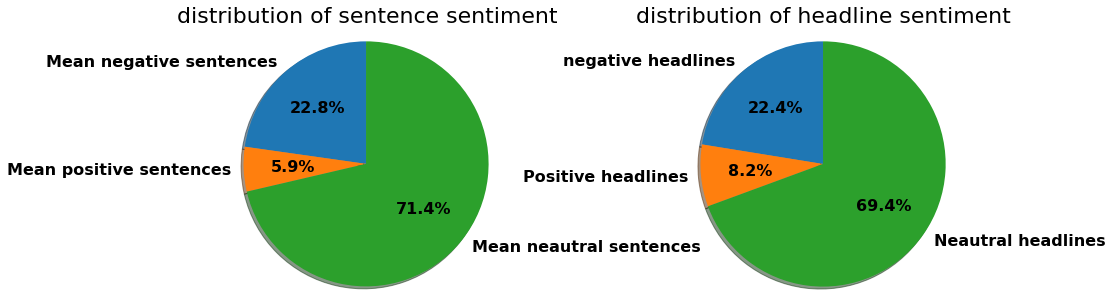

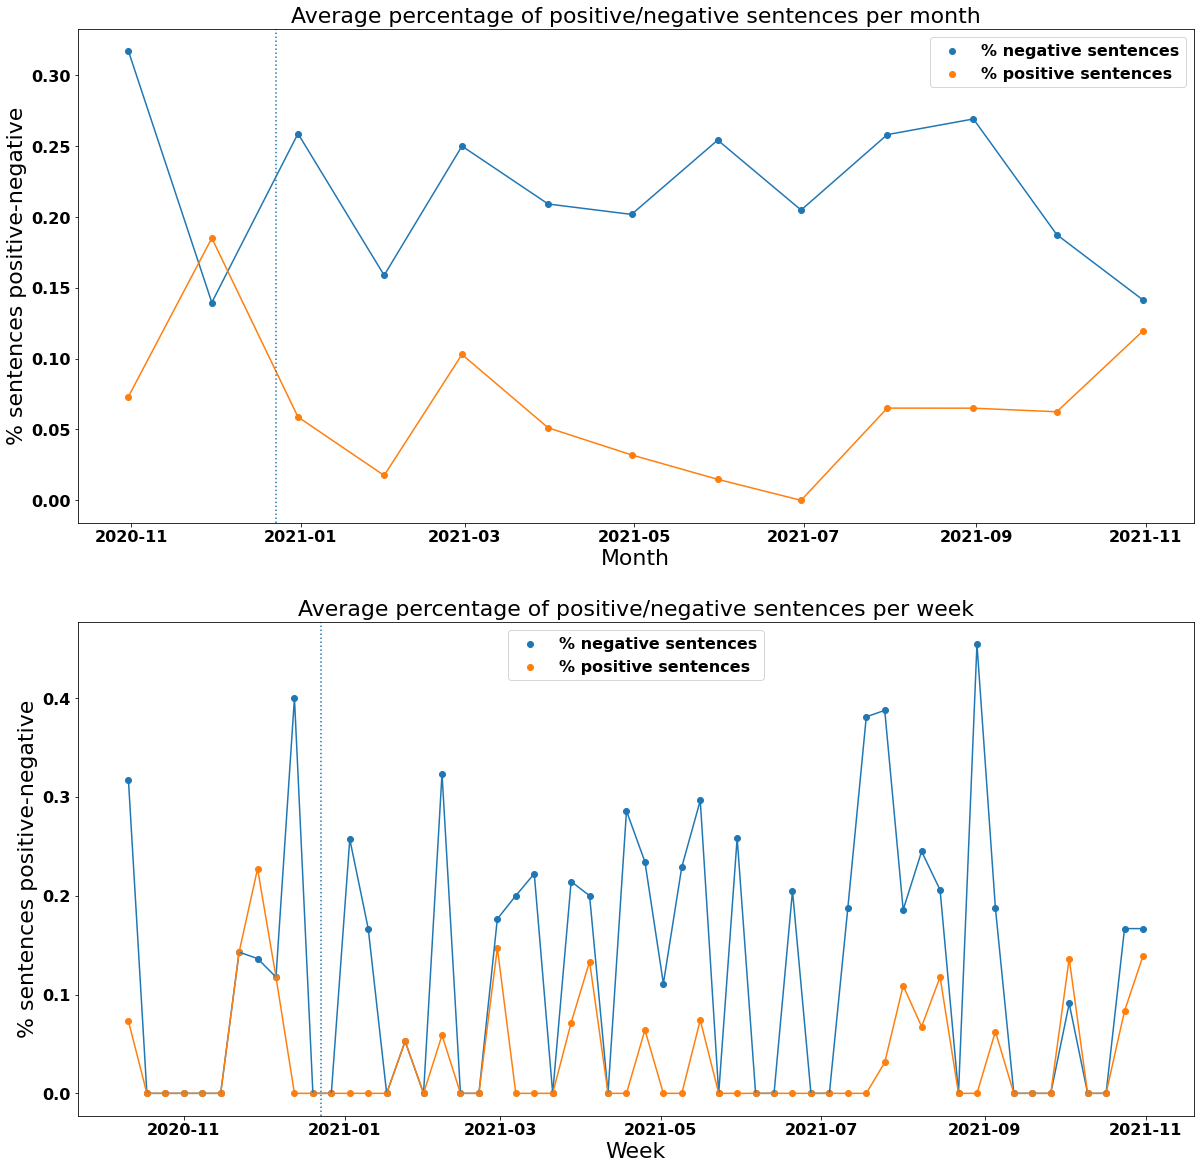

0.011016187050359711

In [35]:
olympics_words="Olympics|Olympic Games|Tokyo"
olympics=df_sub[(df_sub['Title_en'].str.contains(olympics_words))|(df_sub['Text_en'].str.contains(olympics_words))]
sentiment_analysis(olympics,'2020-12-23')
len(olympics)/len(df_sub)

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


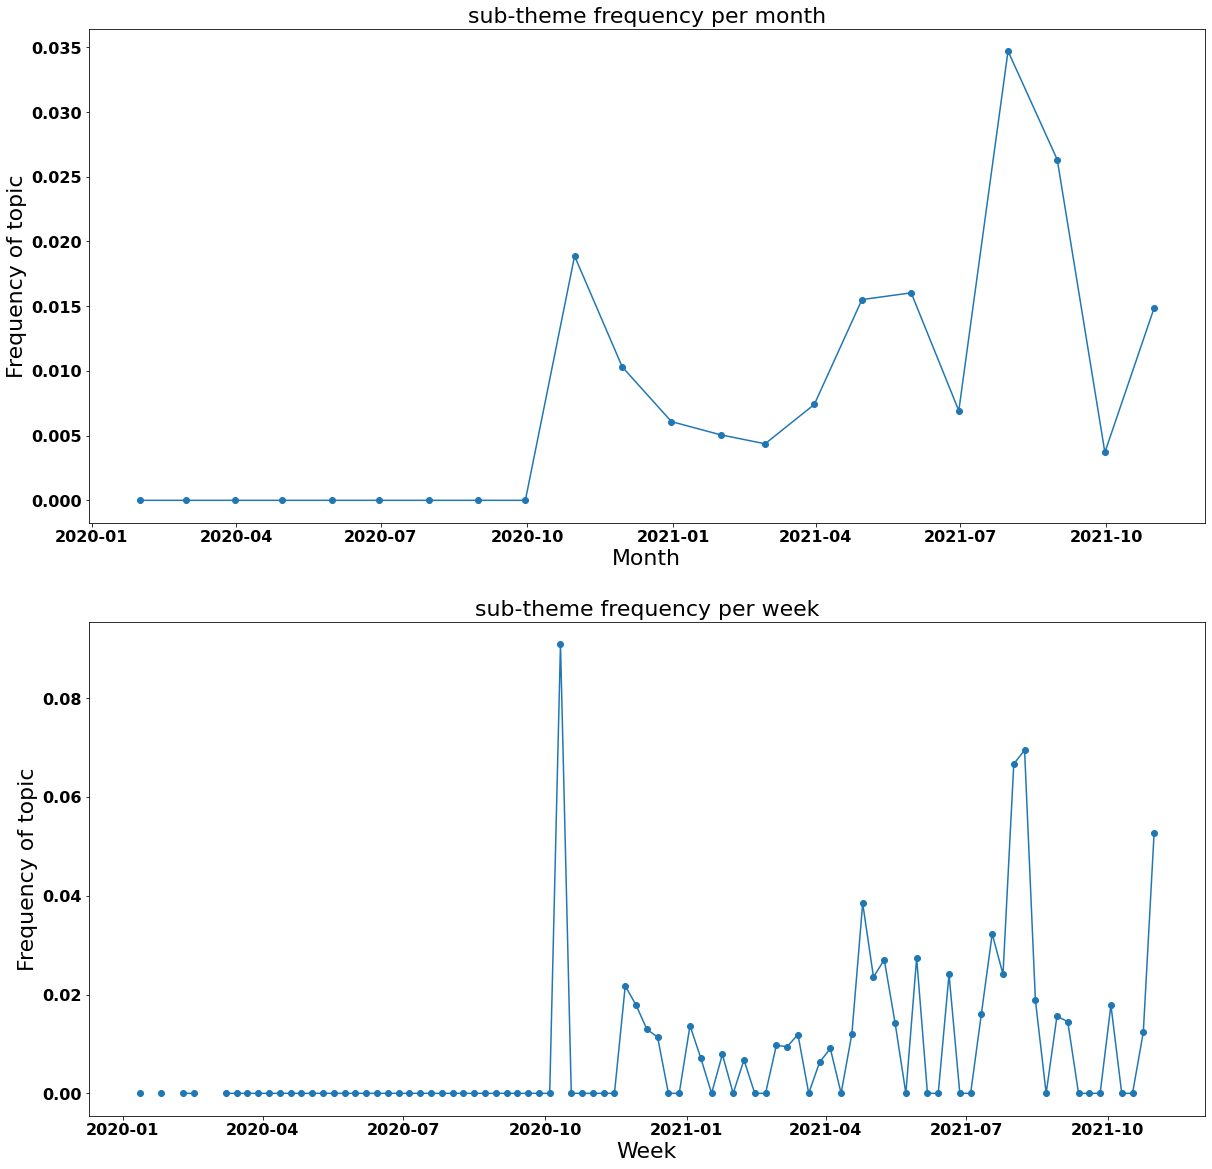

In [36]:
frequency_topics(df_sub,olympics)

SAMPLES OF POSITIVE SENTENCES
SIR – I hope the country will find a suitable way to show its appreciation to the thousands of volunteers who have made the vaccine rollout such a success.When I had my first jab earlier this month I was amazed by the good-natured efficiency of the volunteers.They are doing a job even more important than the games-makers at the 2012 Olympics, but rather less glamorous.
The chargers would be perfectly operable during other times.Bernard SulekChepstow, MonmouthshireOlympic runners-upSIR– It is gratifying to see winners of a silver or bronze medal at the Olympics appreciate their achievement, often with an outpouring of emotion.
SAMPLES OF NEGATIVE SENTENCES
Japan is set to place Tokyo under a state of emergency that would last through the Olympics, fearing an ongoing Covid-19 surge will multiply during the Games.
Tokyo governor Yuriko Koike noted that the largest increase in serious cases and hospitalisations was among people aged in their 50s and younger pe

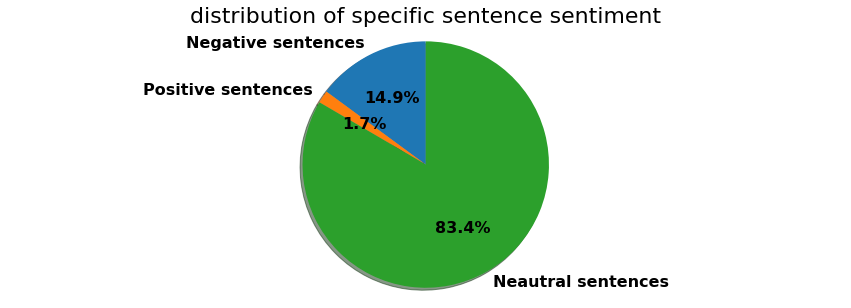

In [37]:
sentences_with_word(olympics,olympics_words)

In [38]:
olympics

Title_en  \
137   Letters: Will boosters stop the double-jabbed ...   
168   'Our economy is bouncing back ahead of the EU ...   
212   Holidaymakers hoping for swift getaway told th...   
259   Monday evening news briefing: Hope for care ho...   
532   Schools face 'disruption' if child vaccines ar...   
900   Letters: Living in suspended animation waiting...   
912   The Telegraph weekly news quiz: Who won Britai...   
943   Novak Djokovic's defence of Australian Open in...   
997   Letters: Those who refuse Covid vaccines are i...   
1210  QR codes could\nallow Covid vaccine recipients...   
1232  Letters: The great vaccination campaign needs ...   
1475  Tuesday morning UK news briefing: Duke of Camb...   
1566    Britain risks squandering its vaccine advantage   
1568  Thursday evening UK news briefing: Britain nee...   
1578  Once more we are lions led by donkeys – Britai...   
1951  Thursday evening UK news briefing: Up to 30 co...   
2139  Andy Murray backs compulsory Covid-19 vaccinat...   
2662  'Open up travel and let us enjoy life' - Reade...   
2666  Letters: The Government should pay young peopl...   
2680  Global vaccine rollout must sprint to the fini...   
2738  Letters: Futile policy based not on those ill ...   
2791  Doubts over foreign fans at Olympics while Jap...   
2883  British athletes in limbo as UK Anti-Doping fa...   
2950  'Redemption': How a scientist's unwavering bel...   
3112  Letters: Volunteers in the vaccination campaig...   
3130  Lockdown doom loop has plunged our island into...   
3133  Britain's vaccine head start will count for no...   
3152  Government asked to fast-track Team GB athlete...   
3201  Economic Covid is over in the West – but bewar...   
3482  Japan declares third Covid state of emergency ...   
3517  Tokyo Olympics should go ahead without any fan...   
3553  Japan raises coronavirus alert level near Toky...   
3674  Taoiseach promises ‘steady as she goes' approa...   
3755  Officials in Tokyo alarmed as coronavirus case...   
3914  Japan to expand Covid emergency areas as cases...   
3955  South Korea begins vaccination of likely Olymp...   
4000  Japan to extend virus emergency in Tokyo weeks...   
4077  Electric Picnic organiser confident festival w...   
4127  Tokyo to host Olympics under Covid-19 state of...   
4252  Japanese workers return to offices as Covid st...   
4276  Tokyo virus cases hit six-month high two days ...   
4287  Tokyo Olympics organisers' request for 500 nur...   
4376  Pandemic setback as global Covid deaths and ca...   
4393  Japan looks to ease virus state of emergency a...   
4475  Japan extends virus emergency for two weeks in...   
4529  Covid cases hit six-month high in Tokyo a week...   
4780  Japan opens mass vaccination centres two month...   
4792  Japan widens virus state of emergency after re...   
4802  Anti-Olympics petition in Japan gains tens of ...   

                                            Subheadline  \
137                                               error   
168   From new freedoms for the double jabbed to suc...   
212   Plus: Read Baroness McGregor-Smith on how the ...   
259   Your evening guide: All care home residents an...   
532                                               error   
900                                               error   
912   How closely have you been paying attention to ...   
943   World No 1 has not revealed his vaccination st...   
997                                               error   
1210  'Political conversation' about proposal that w...   
1232                                              error   
1475  Also from this morning's Front Page newsletter...   
1566  In the hands of risk-averse epidemiologists an...   
1568  Also in this extract from our Front Page newsl...   
1578  This Government presides over failure after fa...   
1951  Also from this evening's Front Page newsletter...   
2139  Novak Djokovic could face a difficult decision...   
2662  Vaccine booster jabs and Bri

In [39]:
### get the index of positive/negative/neutral sentences of the list of sentences
indices = [i for i, x in enumerate(olympics.list_labels[943]) if x == 2]
for i in indices: 
    print(olympics.list_sentences[943][i])

We have a responsibility as players that are travelling across the world to look out for everyone else as well.“I’m happy that I’m vaccinated.


## COUNTRIES

In [40]:
usa_words="United States|US|Biden|Trump"
usa=df_sub[(df_sub['Title_en'].str.contains(usa_words))|(df_sub['Text_en'].str.contains(usa_words))]

In [41]:
len(usa)/len(df_sub)

0.23358812949640287

SAMPLES OF POSITIVE HEADLINES
Pfizer reports Covid-19 vaccine more than 90% effective in children
How British ingenuity delivered a game-changing Covid jab
'Open up travel and let us enjoy life' - Readers on the week's biggest stories
SAMPLES OF NEGATIVE HEADLINES
Vaccines send business optimism to highest level in almost six years
In talking down AstraZeneca's success, the EU has sacrificed lives for the integrity of the European Project
Scientists in spat over whether to infect people in coronavirus vaccine trials


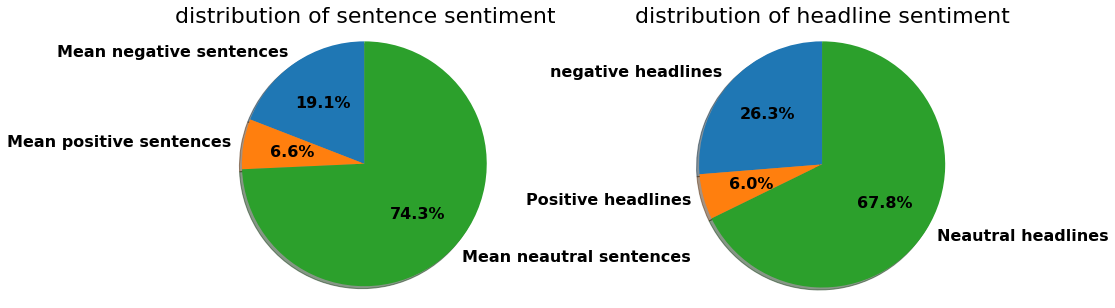

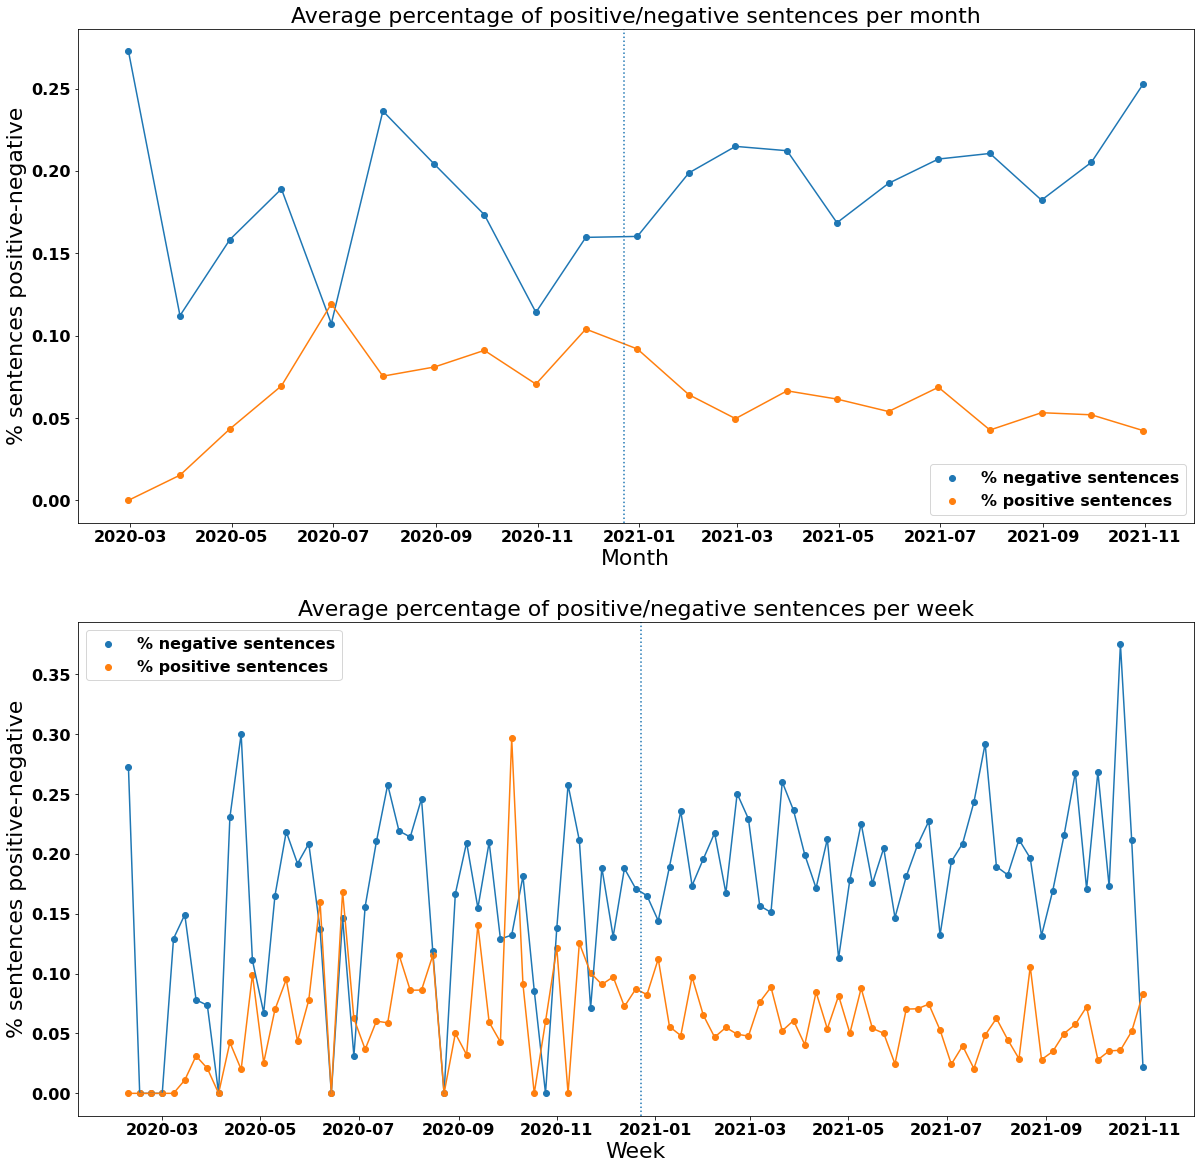

In [42]:
sentiment_analysis(usa,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


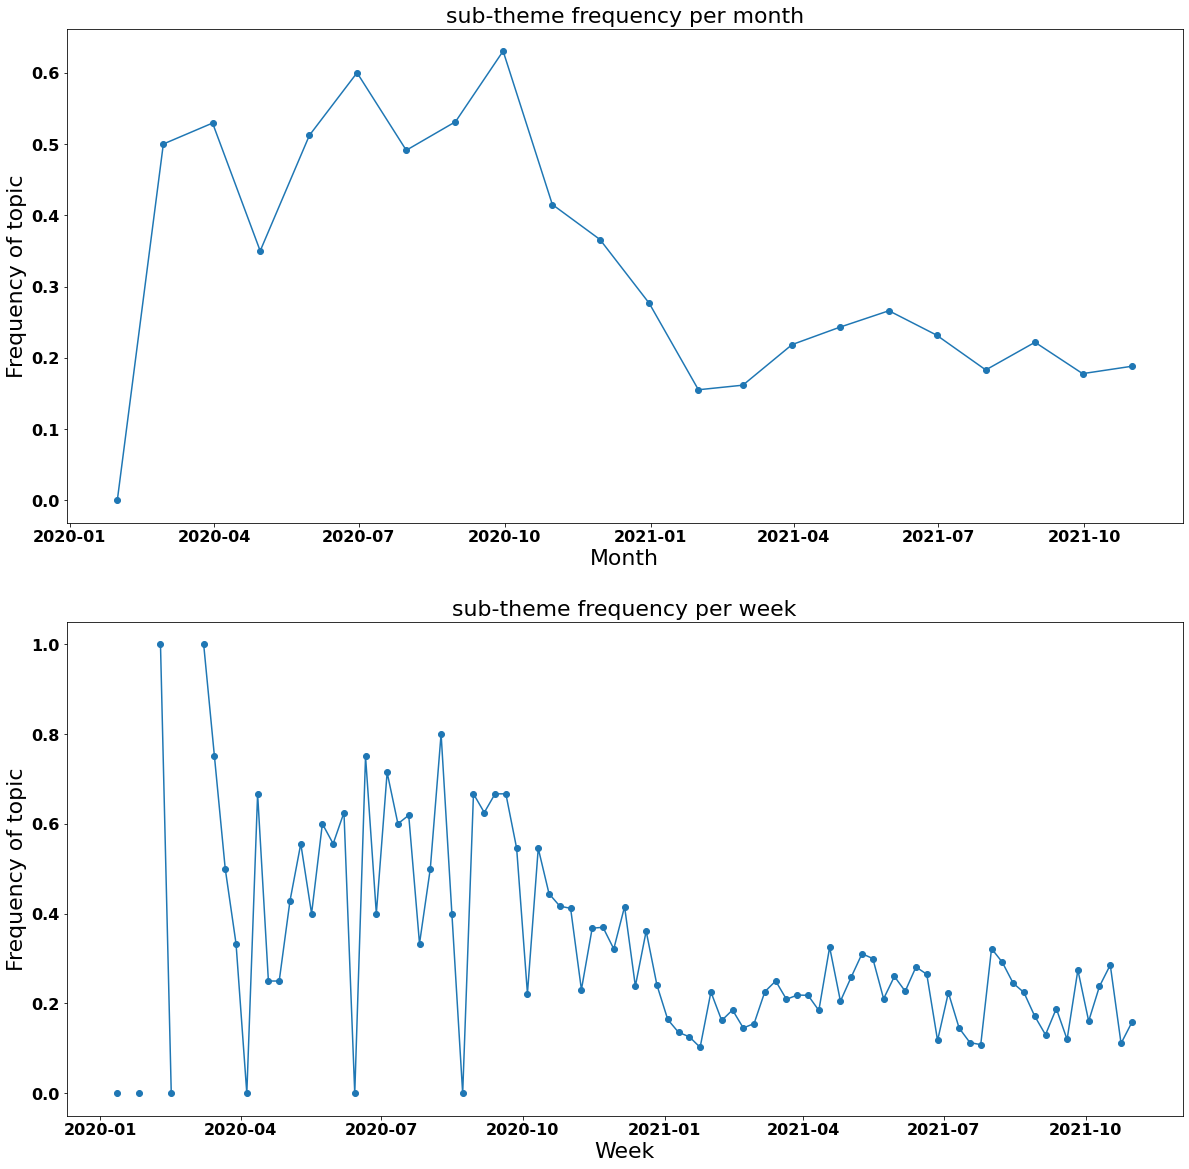

In [43]:
frequency_topics(df_sub,usa)

SAMPLES OF POSITIVE SENTENCES
"Pfizer have done a great job in being consistent on their delivery schedule," he said, adding that the company had done "remarkable things to increase their production, not just for us but for the whole world, for Europe and the US as well.
But when looking at just severe disease it was shown to be 85 per cent effective.In a telebriefing with journalists Dr Matt Hepburn, Covid-19 vaccine response lead at the US Operation Warp Speed, said: “We now have a vaccine where, frankly, simple is beautiful... It’s a vaccine that is easy to transport, a vaccine that you can give in one dose and that is going to have a very significant public health impact.
SAMPLES OF NEGATIVE SENTENCES
Clearly Fed officials are alarmed by the elimination of safety nets when they might still be needed.Joe Biden’s grand reflation plan is dead.
Prof Sir Bell went on to say that the data on this issue was still being collected for further study.What about the Johnson and Johnson vaccine

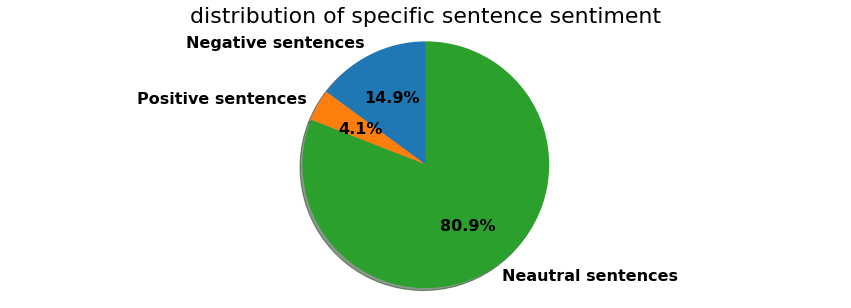

In [44]:
sentences_with_word(usa,usa_words)

In [45]:
russia_words="Russia|Moscow|Putin"
russia=df_sub[(df_sub['Title_en'].str.contains(russia_words))|(df_sub['Text_en'].str.contains(russia_words))]
len(russia)/len(df_sub)

0.047437050359712234

SAMPLES OF POSITIVE HEADLINES
There is only one number that matters to investors this year
Letters: A resounding yes to vaccinating older people faster by working round the clock
Johnson & Johnson's one-shot vaccine will help save the economy
SAMPLES OF NEGATIVE HEADLINES
The EU’s moral authority is crumbling fast
Britain's spies foil a record number of cyber attacks, as hackers target Covid-19 research
Chinese state-owned SinoPharm says it could produce more than 1 billion vaccine doses next year


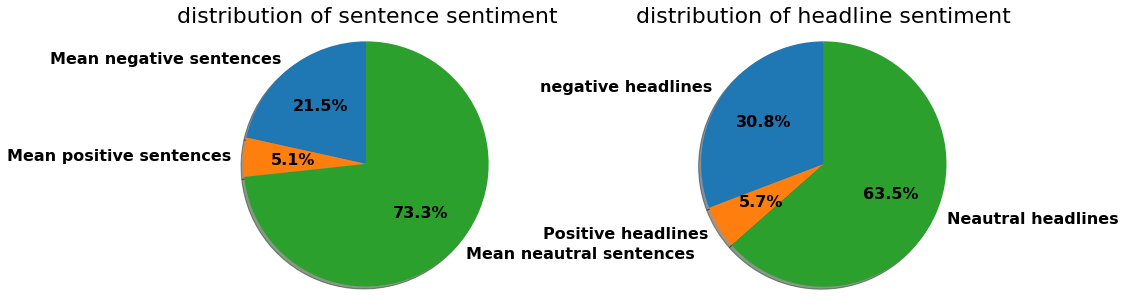

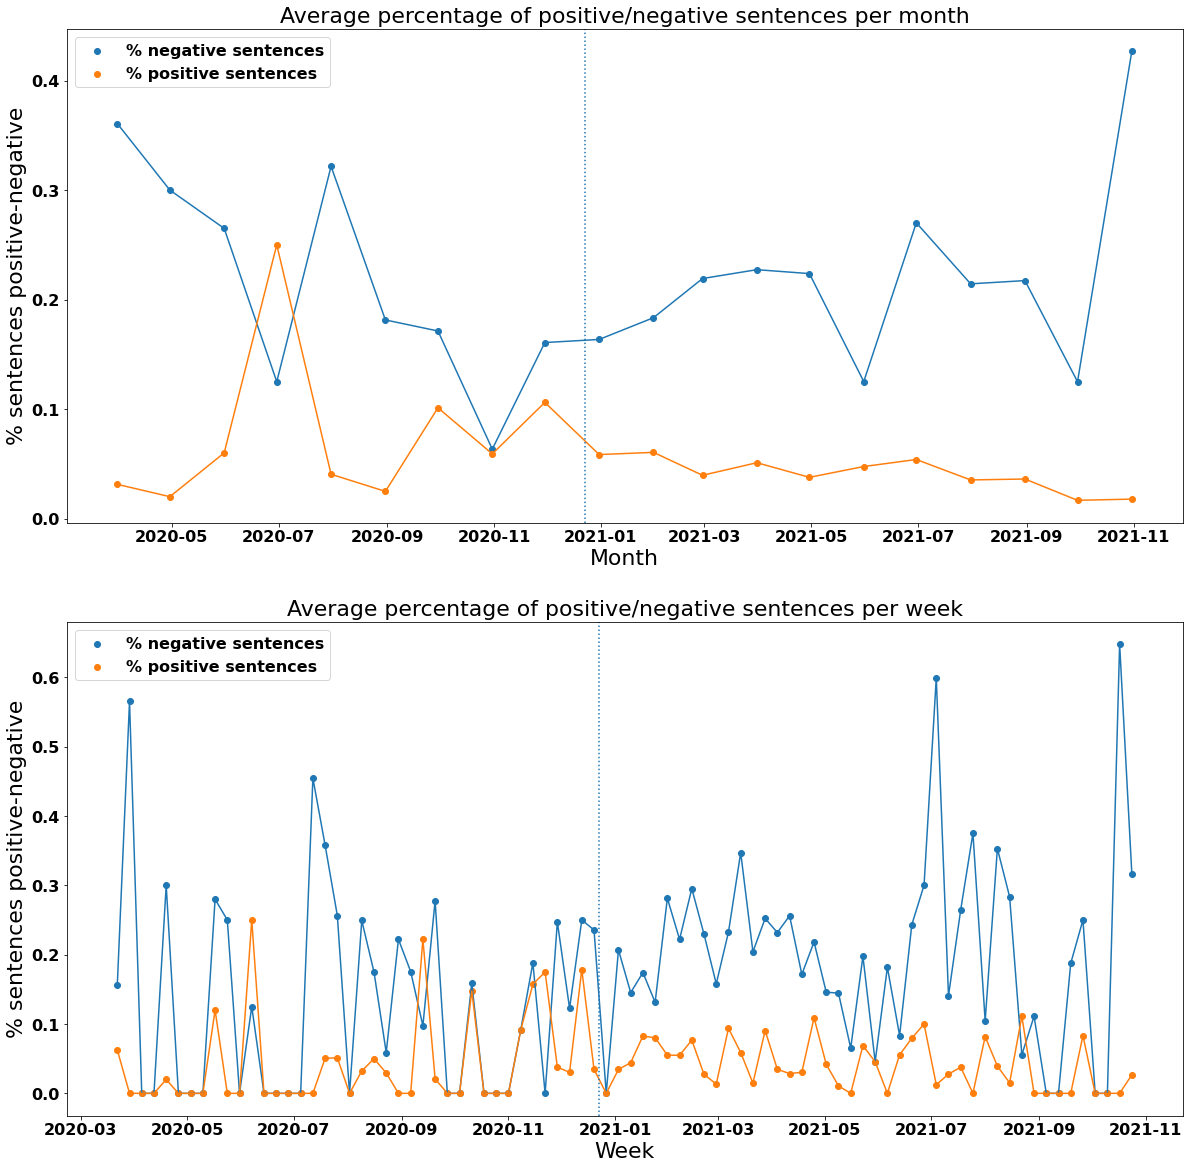

In [46]:
sentiment_analysis(russia,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


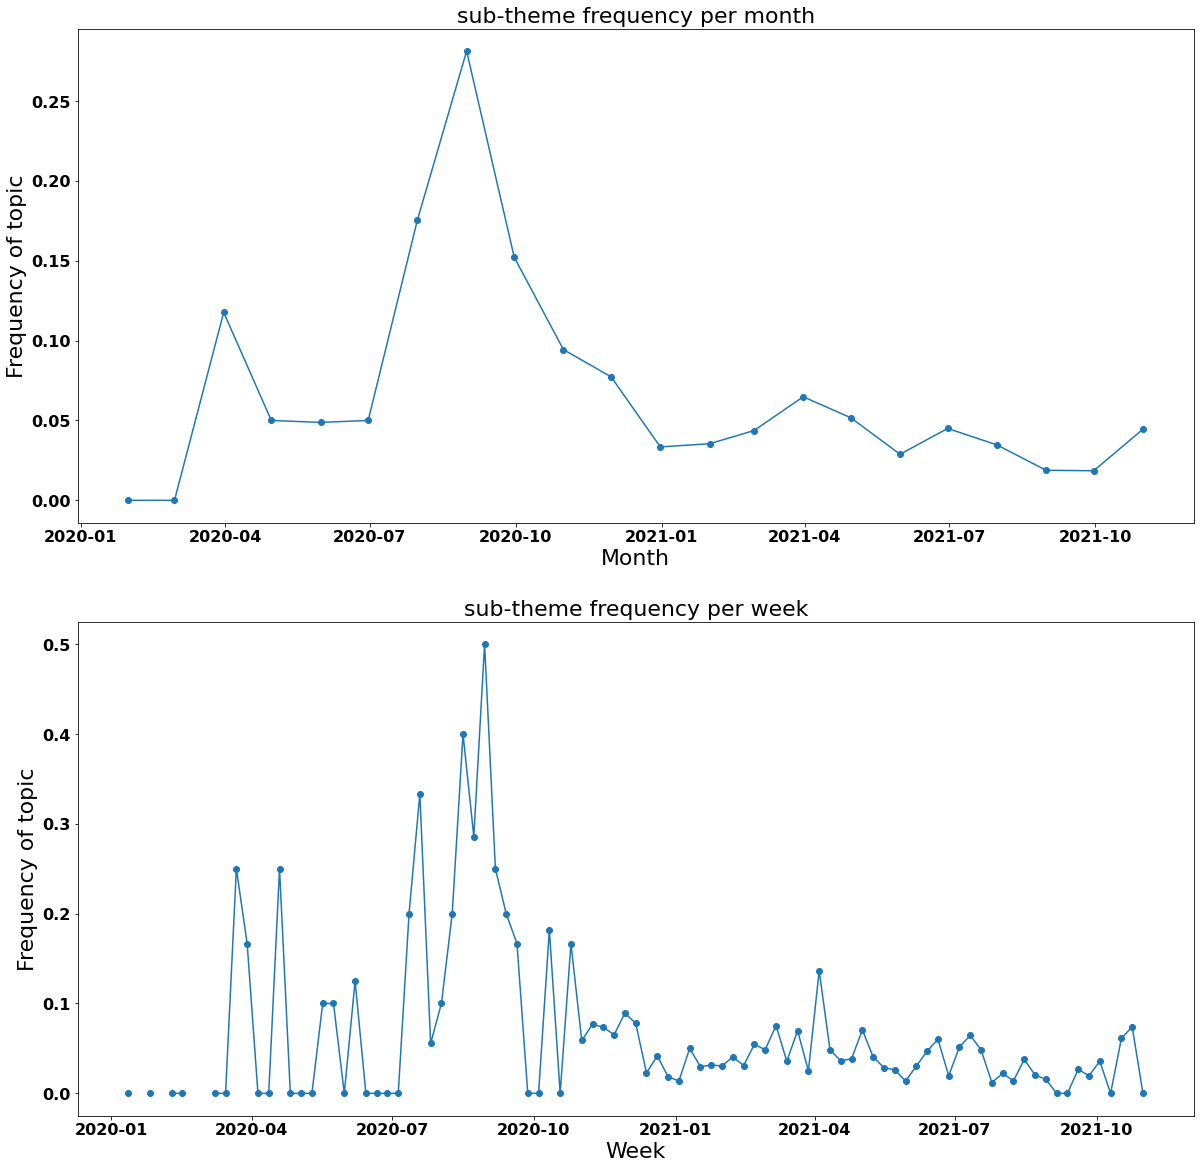

In [47]:
frequency_topics(df_sub,russia)

SAMPLES OF POSITIVE SENTENCES
Russia approves worlds first Covid-19 vaccine  President Vladimir Putin has said Russia has become the first country in the world togrant regulatory approval to a Covid-19 vaccineafter less than two months of human testing, a move hailed by Moscow as evidence of its scientific prowess.
Am planning my outfit.Katie BuddellFetcham, SurreySIR – Almost two years ago, the spire of Salisbury Cathedral was claimed to have attracted two Russian Novichok travellers to the city.How appropriate that the spire is now a beacon of hope over one of our nation’s new mass-vaccination centres.Geoffrey TaylorSalisbury, WiltshireSIR – I’m 75 and received a phone call on Sunday at 12.20pm inviting me for a vaccination at 1.45.
SAMPLES OF NEGATIVE SENTENCES
Mr Navalny was detained at a Moscow airport on Sunday after he returned to Russia for the first time after his near-fatal poisoning.Nataliya Vasilyevaanalyses how, after branding him a traitor for months,the Kremlin had littl

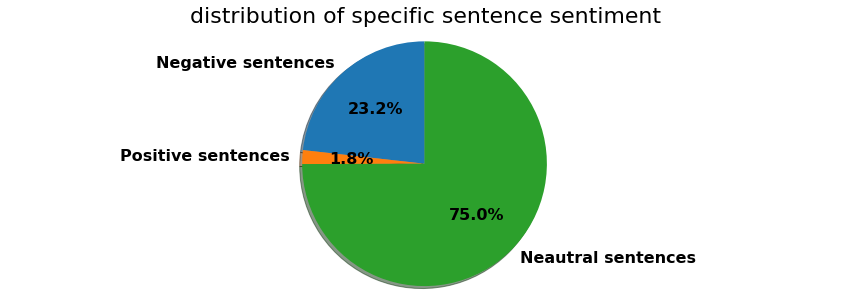

In [48]:
sentences_with_word(russia,russia_words)

In [16]:
uk_words="Boris Johnson|Javid|Hancock"
uk=df_sub[(df_sub['Title_en'].str.contains(uk_words))|(df_sub['Text_en'].str.contains(uk_words))]
len(uk)/len(df_sub)

0.25989208633093525

SAMPLES OF POSITIVE HEADLINES
Theme park to offer Covid jabs to thrill-seekers – but they’ll have to wait to enjoy the rides
Thursday evening news briefing: Our Covid vaccine works, insists Boris Johnson
It’s time for Nicola Sturgeon to keep calm and learn to love the vaccine
SAMPLES OF NEGATIVE HEADLINES
Workers refusing vaccine or testing could lose wages, lawyers warn
There is no excuse for yet more restrictions
Tory biosurveillance fantasy is chilling and farcical in equal measure


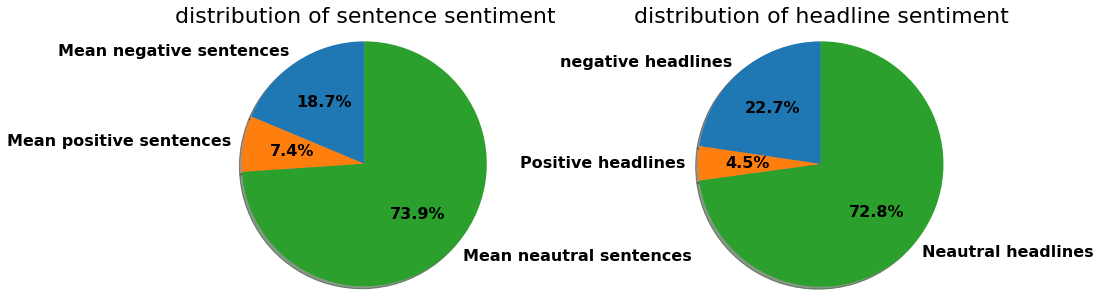

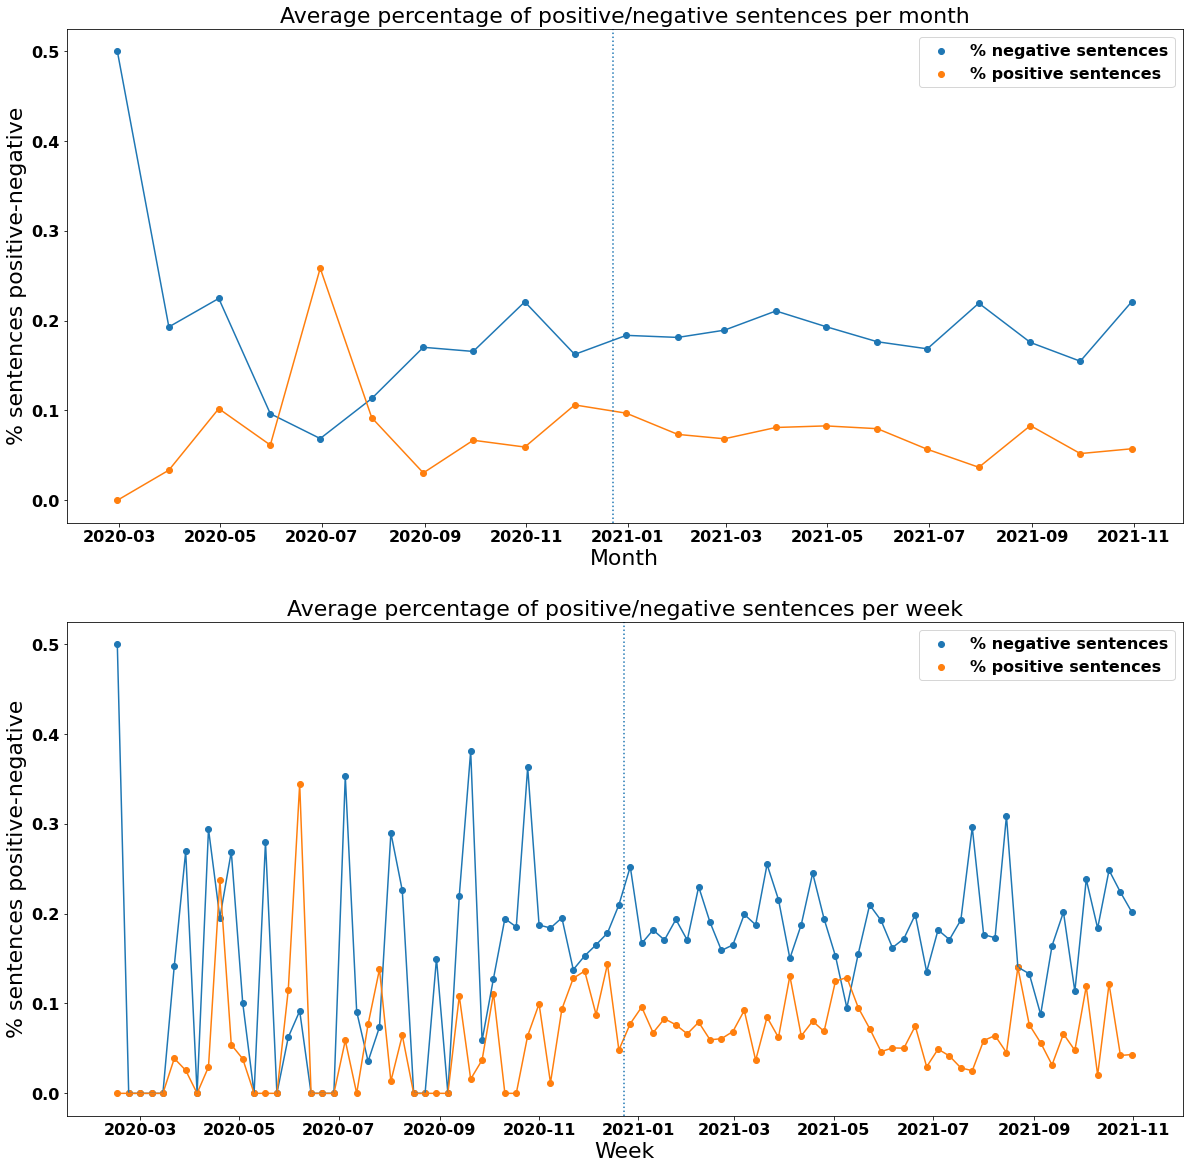

In [17]:
sentiment_analysis(uk,'2020-12-23')

/home/david/Escritorio/VACCINATION_PROJECT/sentiment_functions.py:147: RuntimeWarning: invalid value encountered in true_divide
  frequency_week=merged_data_weekly.Link_y.values/merged_data_weekly.Link_x.values


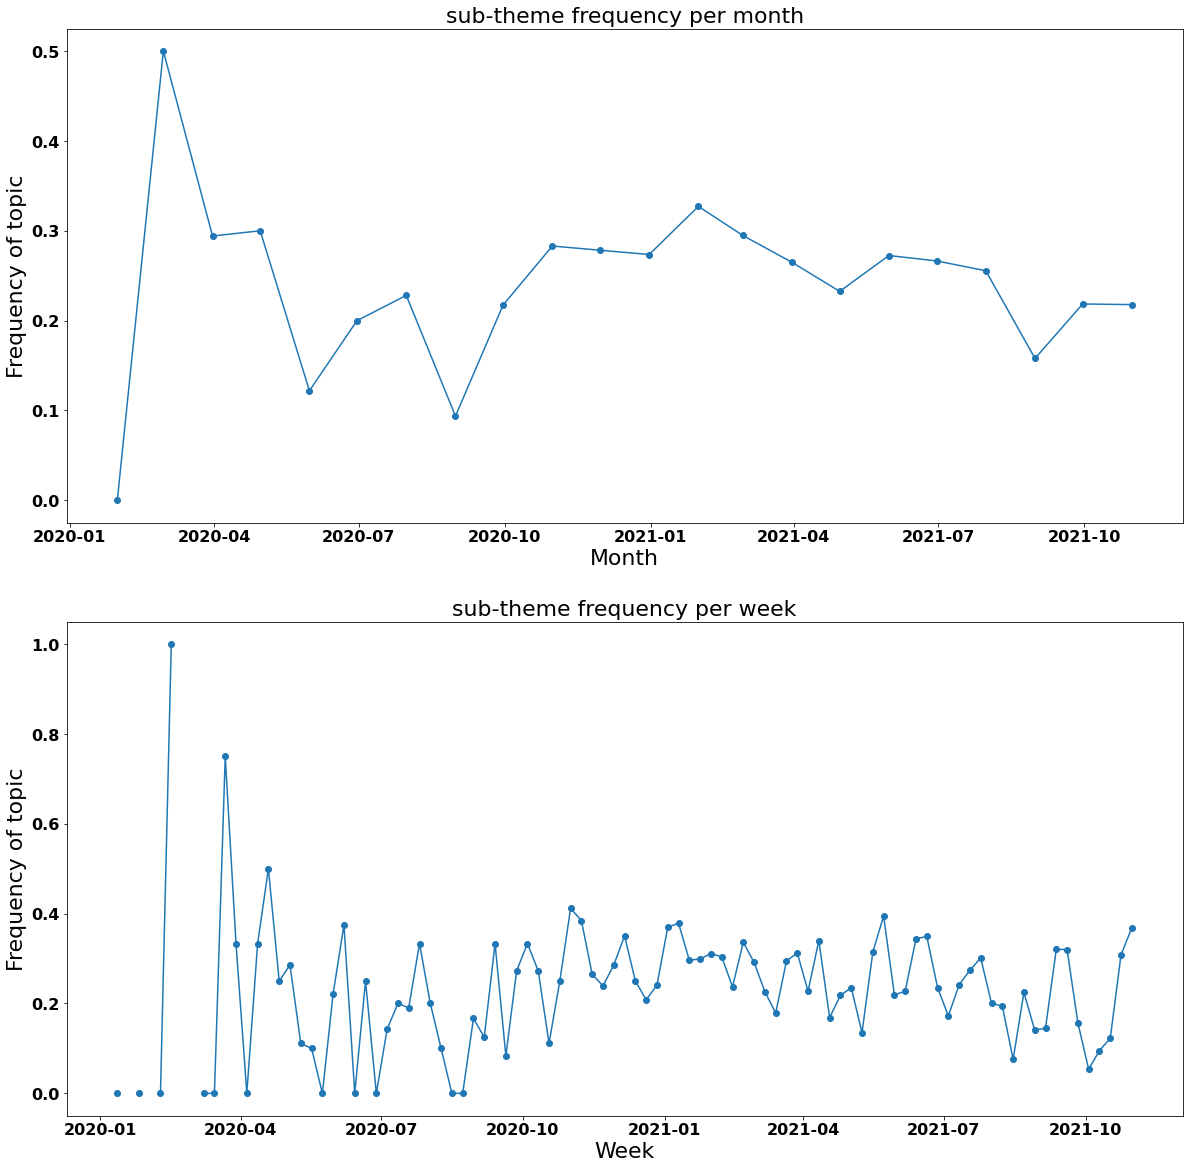

In [18]:
frequency_topics(df_sub,uk)

SAMPLES OF POSITIVE SENTENCES
The UK Government is now targeting offering everyone their first Covid jab by July 19, the new date for the final step of reopening in England.Boris Johnson said: “Offering all adults a jab less than 200 days after the programme launched is one of our country’s greatest collective achievements, saving over 14,000 lives so far.“I cannot thank NHS staff, the Army, volunteers, manufacturers and all those involved in this extraordinary national effort enough.“Today sees vaccines accelerate in their race with the virus - so now let’s finish the job.
Health Secretary Matt Hancock said: "Every week, we are getting more positive news about the range of vaccines in development, and thanks to the work of our taskforce the UK has pre-ordered more hundreds of millions of doses from those companies most advanced in their work.
SAMPLES OF NEGATIVE SENTENCES
"Authors Lord Mann, Boris Johnsons antisemitism tsar and molecular biologist Dr Lewis Arthurton, studied 28 of the

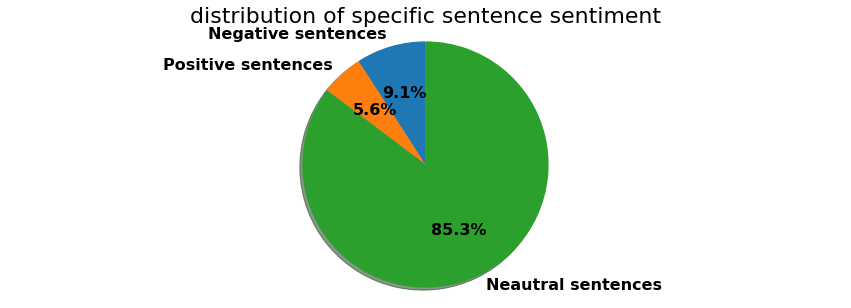

In [52]:
sentences_with_word(uk, uk_words)

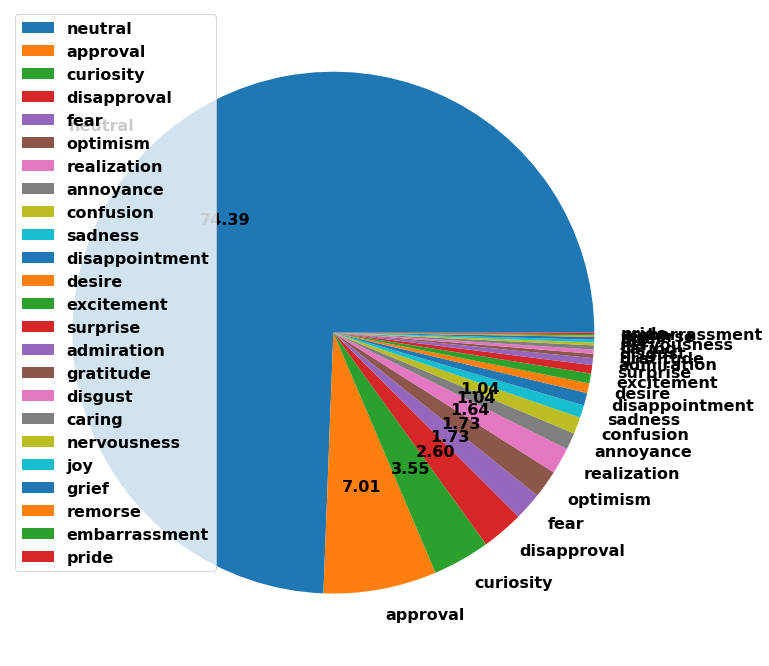

In [19]:
plot_emotions(uk)

## VACCINES

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


SAMPLES OF POSITIVE HEADLINES
AstraZeneca vaccine is safe and effective, European regulator rules
Vaccine success set to put AstraZeneca in pole position
The Oxford coronavirus vaccine has a ‘winning formula’, says AstraZeneca head
SAMPLES OF NEGATIVE HEADLINES
US tells AstraZeneca to cut ties with manufacturer after mix-up ruined factory's vaccine batch
Offering 30-somethings alternative to AstraZeneca vaccine could lead to more deaths, warns adviser
AstraZeneca is a scapegoat for the European Commission's staggering institutional failure


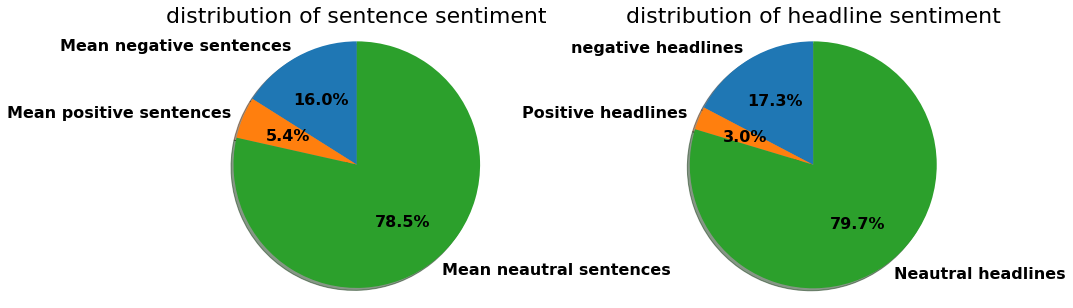

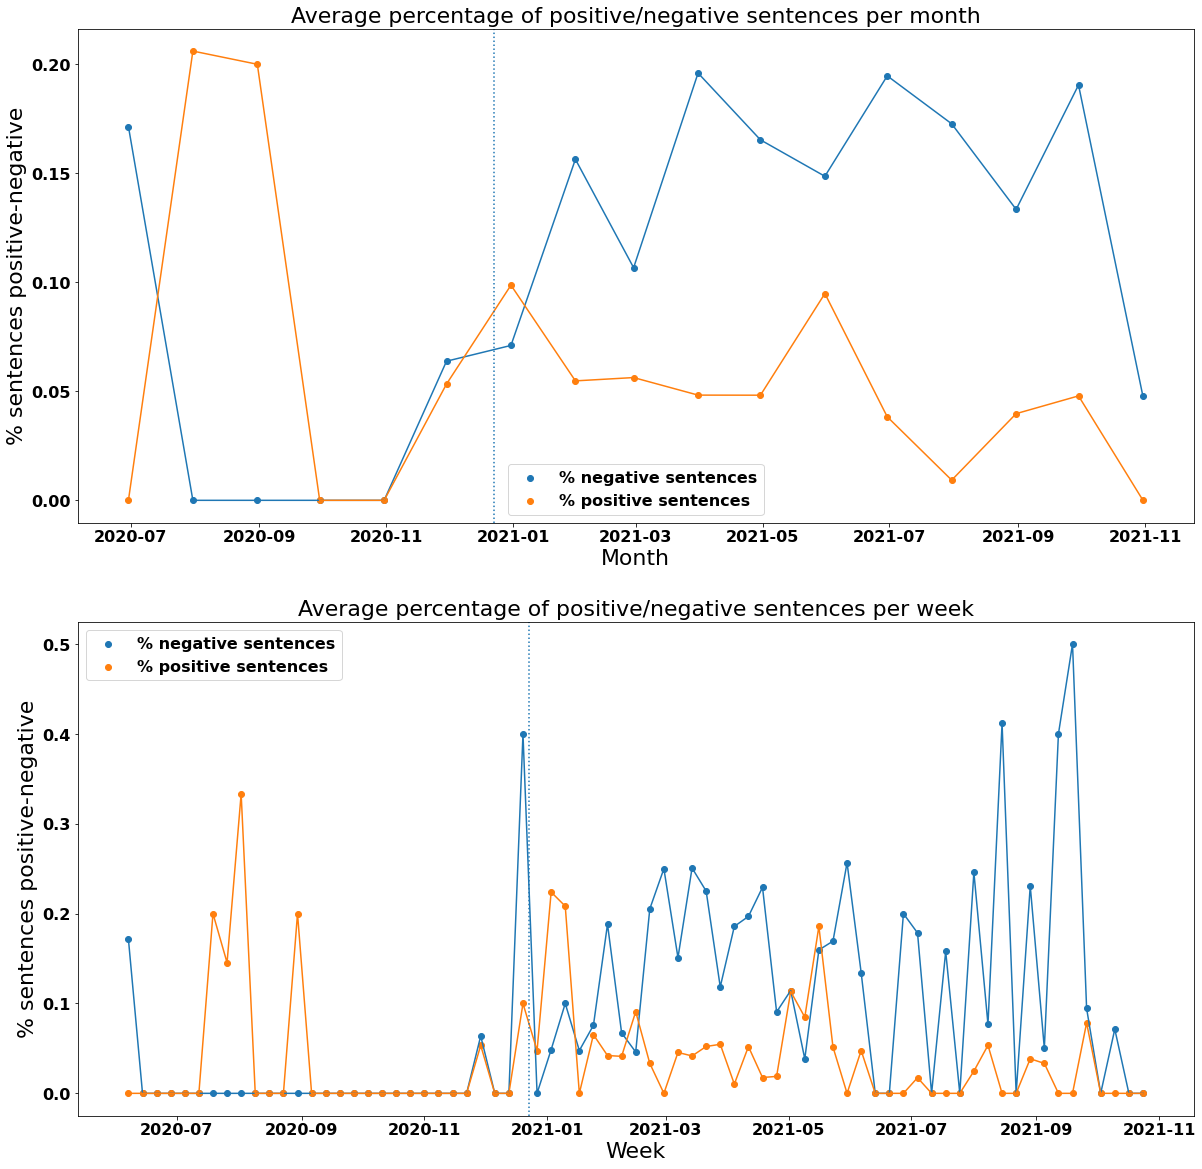

0.051933453237410075

In [6]:
astrazeneca_h=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))&(~df_sub['Title_en'].str.contains("Pfizer|Moderna"))]
sentiment_analysis(astrazeneca_h,'2020-12-23')
len(astrazeneca_h)/len(df_sub)

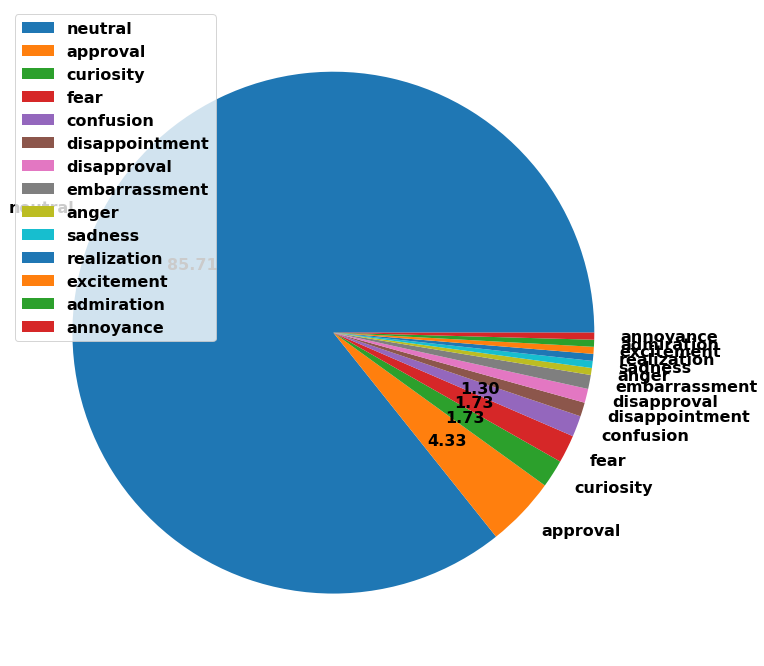

In [7]:
plot_emotions(astrazeneca_h)

In [54]:
astrazeneca_h_t=df_sub[(df_sub['Title_en'].str.contains("Astrazeneca|AstraZeneca"))|(df_sub['Text_en'].str.contains("Astrazeneca|AstraZeneca"))]

SAMPLES OF POSITIVE SENTENCES
"Particularly after the authorisation, hoping thatll go well, of the AstraZeneca vaccine, which should be on the 29th from the European Medicines Agency, and then for delivery in their timeline for mid-February."
"Italy will recommend the AstraZeneca vaccine only for people over 60, the countrys top health adviser said on Wednesday night after the European regulators briefing.Mr Johnson insisted the AstraZeneca vaccine was "safe, effective and has already saved thousands of lives”.
SAMPLES OF NEGATIVE SENTENCES
"Since then, French reports of flu-like side-effects among dozens of health workers further tainted its image.That contributed to a dearth of demand in France, where only 24 per cent of AstraZeneca stocks have been used, according to the health ministry.That is well below a target set at 80-85 per cent and compares with 82 per cent for vaccines made by Pfizer/BioNTech and 37 per cent for those made by Moderna.
The plant cells act like mini-factories

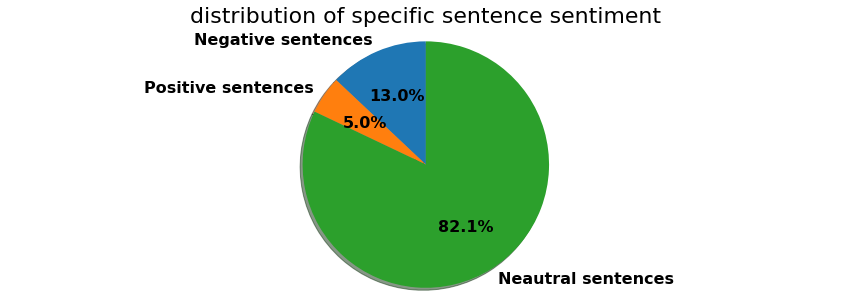

In [55]:
sentences_with_word(astrazeneca_h,'AstraZeneca')

SAMPLES OF POSITIVE HEADLINES
Government strategy vindicated: Delaying Pfizer dose by 12 weeks three and a half times more effective
Third coronavirus vaccine is more effective than Pfizer or Russian jab
Pfizer reports Covid-19 vaccine more than 90% effective in children
SAMPLES OF NEGATIVE HEADLINES
100,000 Pfizer vaccine doses 'thrown away' after faulty PHE guidance, doctors claim
White House 'threatens to sack' FDA chief if Pfizer vaccine not approved today
Pfizer vaccine data breached in cyber attack on European medicine regulator


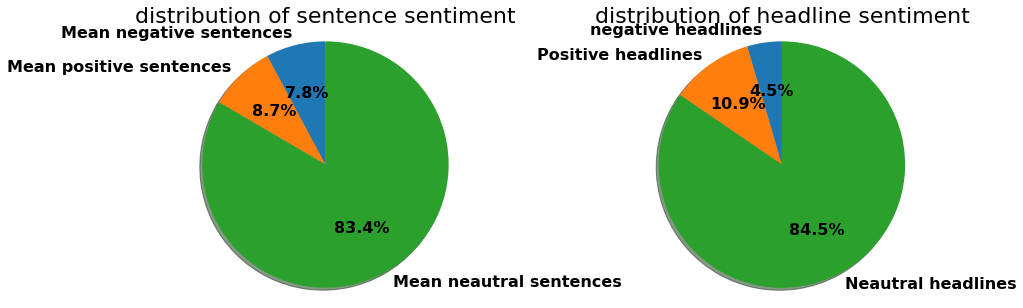

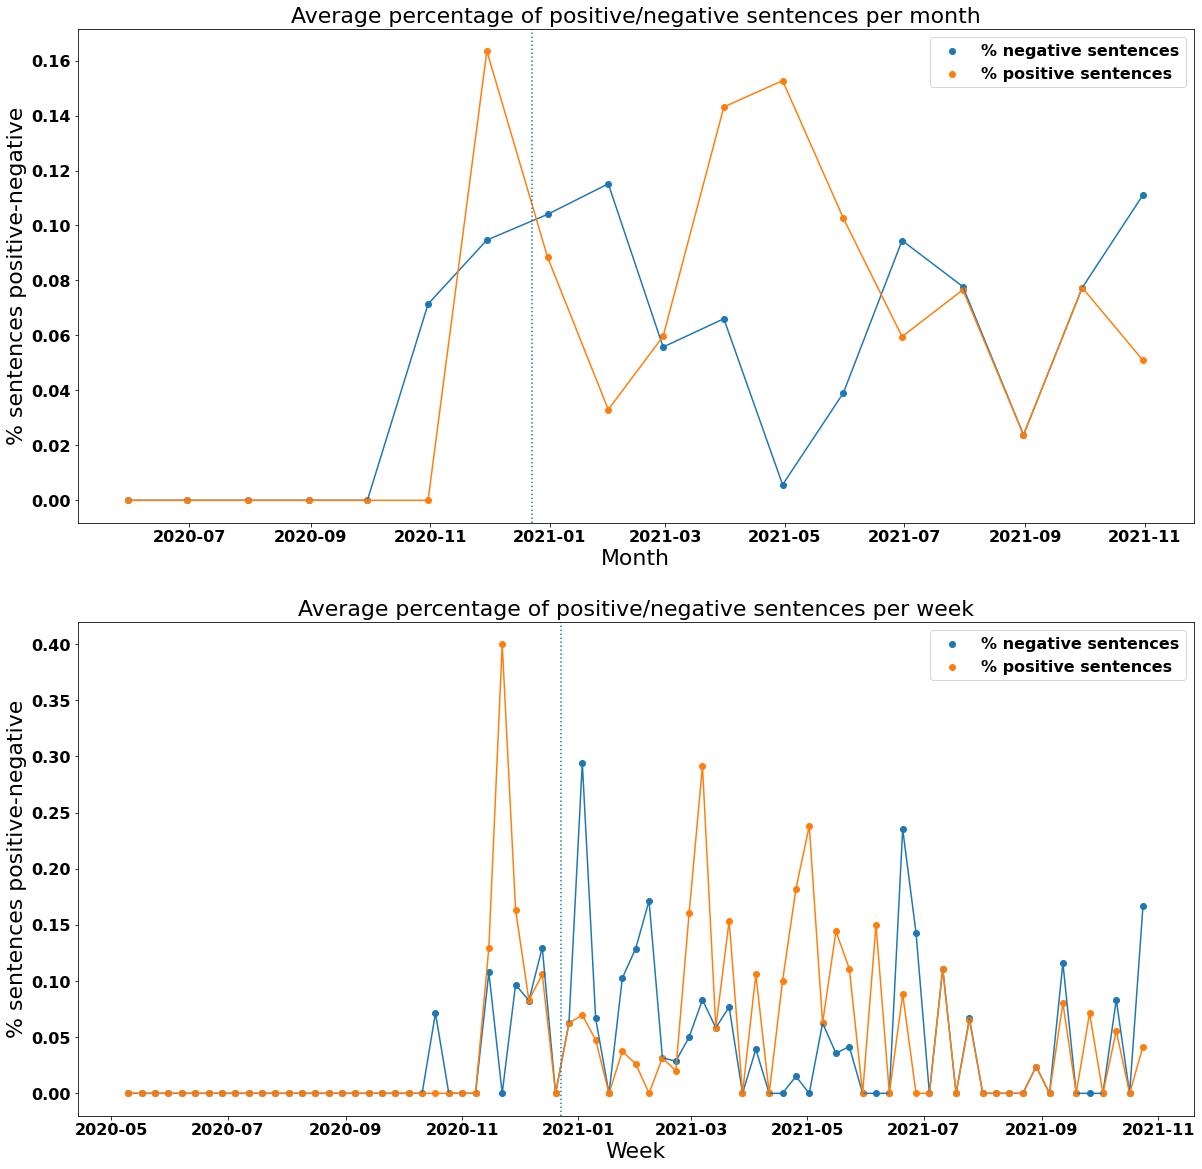

0.02473021582733813

In [8]:
pfizer_h=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Moderna"))]
sentiment_analysis(pfizer_h,'2020-12-23')
len(pfizer_h)/len(df_sub)

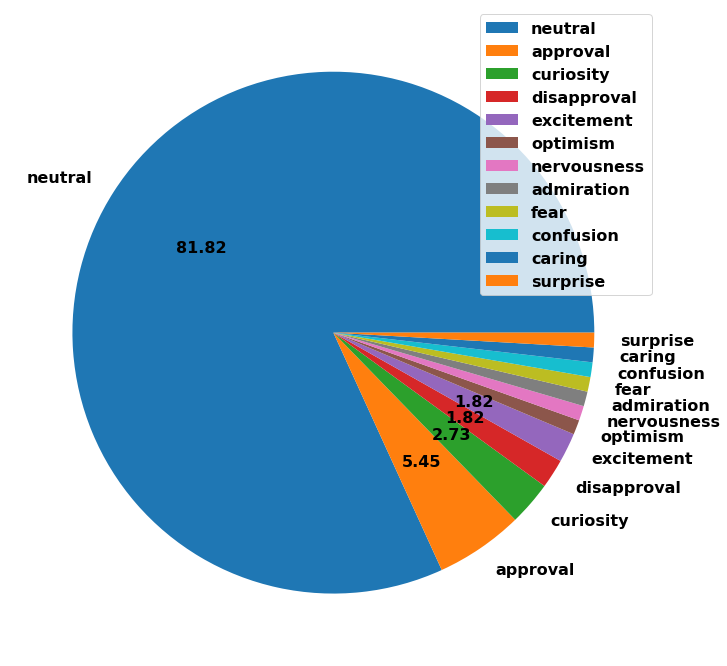

In [9]:
plot_emotions(pfizer_h)

In [57]:
pfizer_h_t=df_sub[(df_sub['Title_en'].str.contains("Pfizer|pfizer"))|(df_sub['Text_en'].str.contains("Pfizer|pfizer"))]

SAMPLES OF POSITIVE SENTENCES
This demonstrates that sometimes a crisis brings the best out of people.”Margaret Keenan, a 90-year-old from Coventry, became the first person in the world to receive the vaccine outside a trial on Tuesday - an event described as a “watershed moment” by the UK’s chief scientist, Sir Patrick Vallance.There was more good news for the Pfizer BioNTech vaccine today when the US Food and Drug Administration said the jab met its safety and efficacy criteria.However, Mr Bourla would not speculate when the FDA would give the shot the green light.
Our brilliant Vaccines Taskforce has secured an extra 60 million doses of the Pfizer/BioNTech vaccines to support our booster programme, which will be developed in line with the advice of our experts.
SAMPLES OF NEGATIVE SENTENCES
“The idea that thatll be done through local GPs sounds a bit unlikely to me.” To make matters worse, the two Pfizer jabs need to be given three weeks apart, a further logistical headache for the 

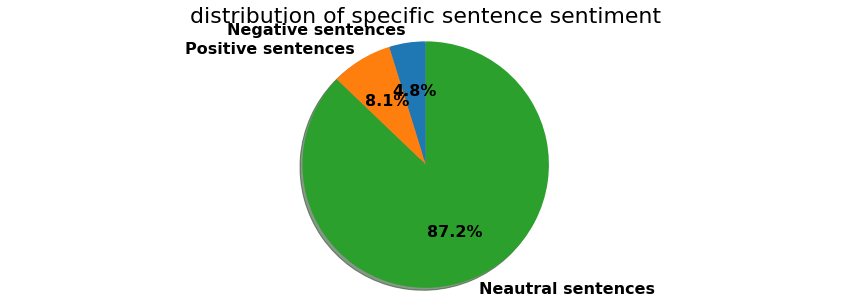

In [58]:
sentences_with_word(pfizer_h,'Pfizer')

SAMPLES OF POSITIVE HEADLINES
No samples of positive headlines
SAMPLES OF NEGATIVE HEADLINES
No samples of negative headlines


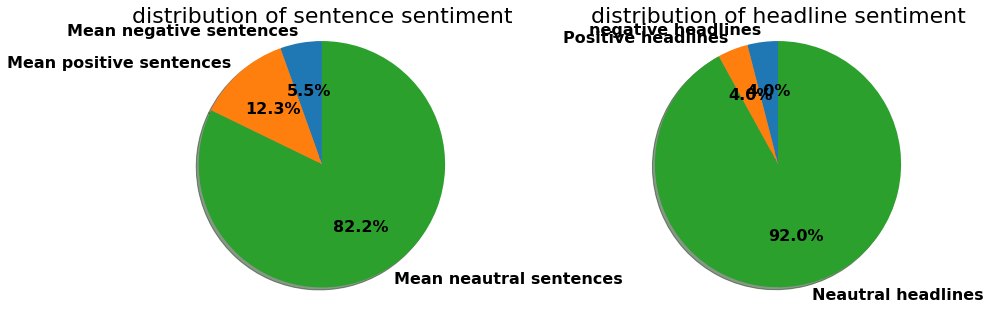

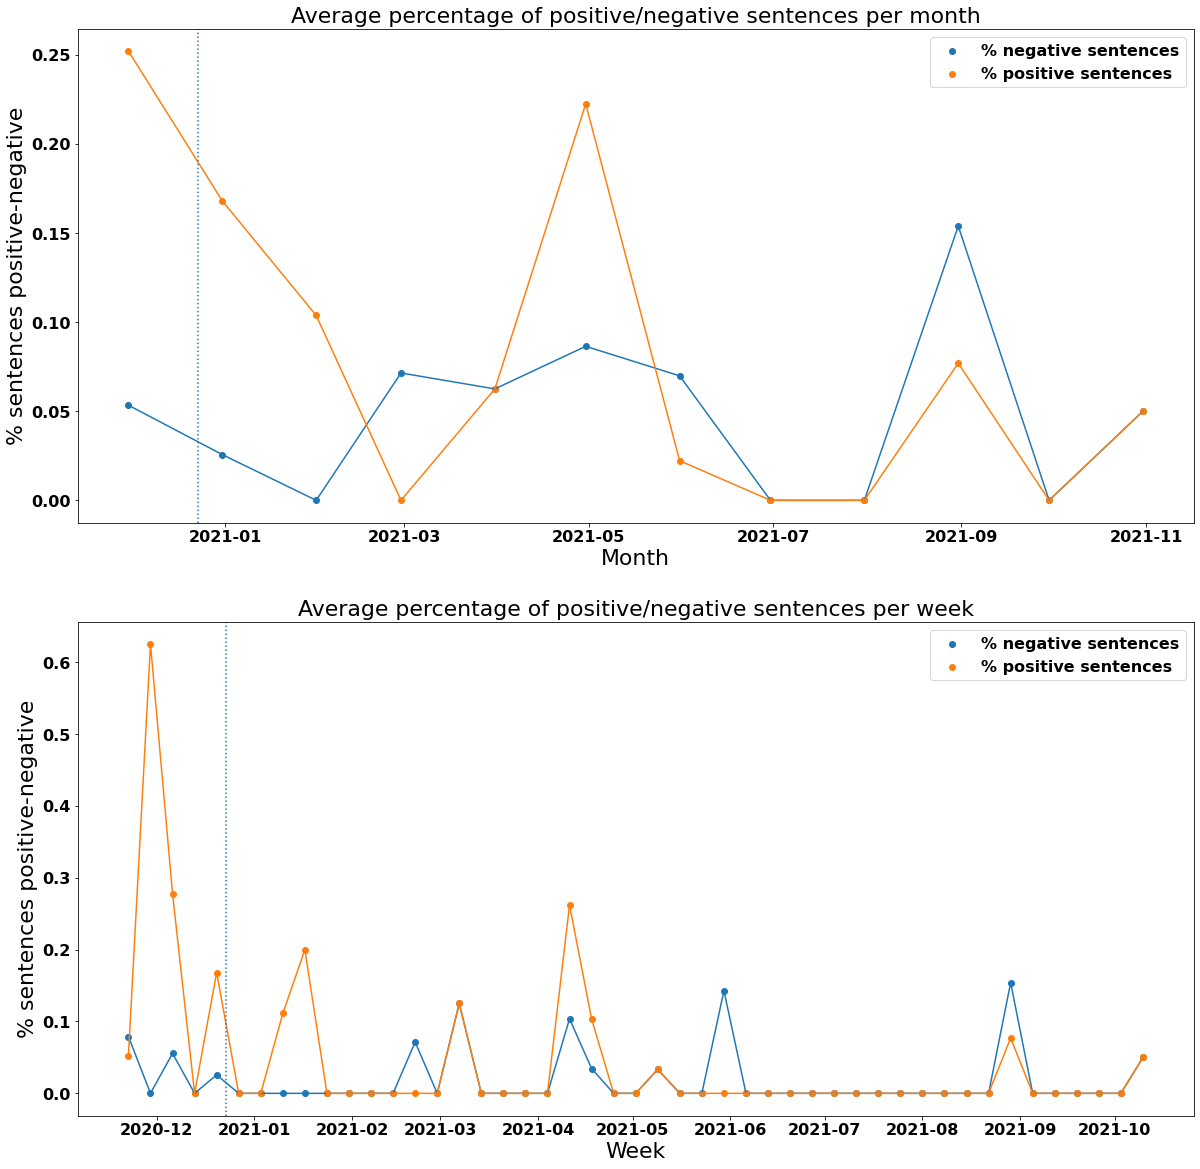

0.005620503597122302

In [10]:
moderna_h=df_sub[(df_sub['Title_en'].str.contains("Moderna|moderna"))&(~df_sub['Title_en'].str.contains("AstraZeneca|Pfizer"))]
sentiment_analysis(moderna_h,'2020-12-23')
len(moderna_h)/len(df_sub)

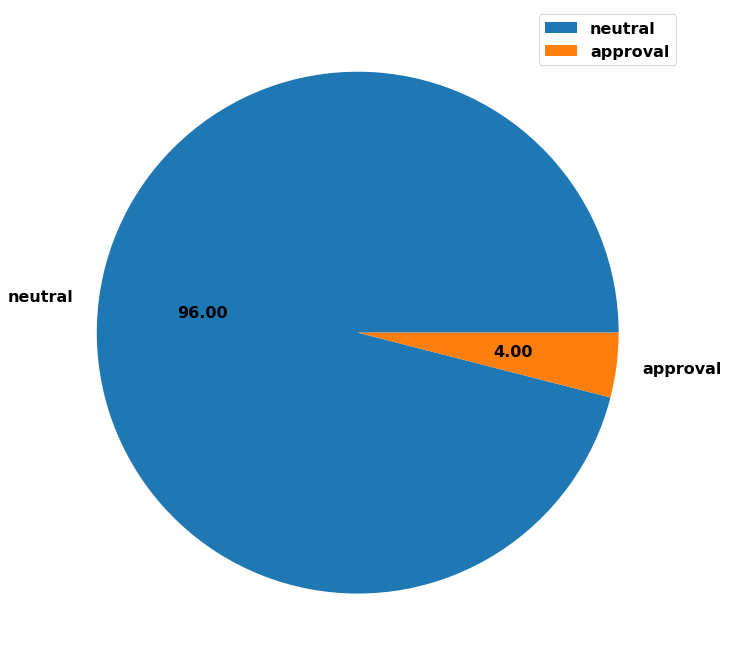

In [11]:
plot_emotions(moderna_h)

In [60]:
moderna_h_t=df_sub[(df_sub['Title_en'].str.contains("Moderna"))|(df_sub['Text_en'].str.contains("Moderna"))]

SAMPLES OF POSITIVE SENTENCES
"Congratulations, the Moderna vaccine is now available!"
"From a biologicaland clinical standpoint, Mr Zakssaid mRNA vaccine technology was exciting because it teachesthe bodys own cells how to make thevirus-busting protein in a way that is extremely accurate and, therefore potent,leavinglittle room for error.Shares in Moderna have risen by 60pcto $142since November 16.
SAMPLES OF NEGATIVE SENTENCES
"How many doses ofModernadoes the UK have?The Government has bought 17 million doses - enough to vaccinate about 8.5 million people.Who got the first UK vaccine?An unpaid carer has become the first Briton in the UK to receive theModernavaccine.
Japan has suspended use of about 1.63 million doses of Moderna vaccine after contamination was found in unused vials.


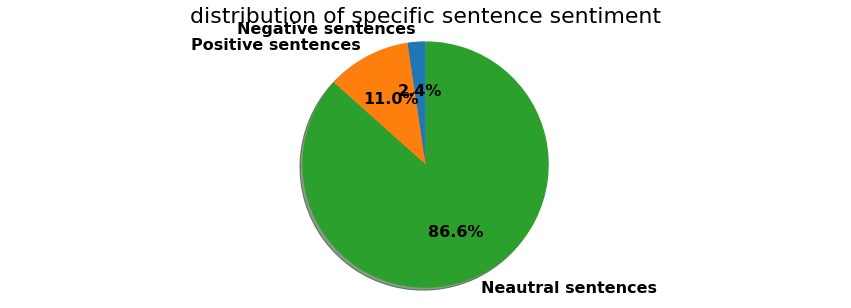

In [61]:
sentences_with_word(moderna_h,'Moderna')

In [4]:
fr_words="France"
fr=df[(df['Title_en'].str.contains(fr_words))|(df['Text_en'].str.contains(fr_words))]
print(len(fr)/len(df))

spain_words="Spain"
spain=df[(df['Title_en'].str.contains(spain_words))|(df['Text_en'].str.contains(spain_words))]
print(len(spain)/len(df))

uk_words="United Kingdom|UK"
uk=df[(df['Title_en'].str.contains(uk_words))|(df['Text_en'].str.contains(uk_words))]
print(len(uk)/len(df))


sw_words="Switzerland"
sw=df[(df['Title_en'].str.contains(sw_words))|(df['Text_en'].str.contains(sw_words))]
print(len(sw)/len(df))

it_words="Italy"
it=df[(df['Title_en'].str.contains(it_words))|(df['Text_en'].str.contains(it_words))]
print(len(it)/len(df))


0.1489005235602094
0.0850261780104712
0.5524607329842932
0.01842931937172775
0.09654450261780105
